### IMPORTING THE NECESSARY LIBRARIES AND LOADING THE DATASET:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('abalone_datatrained.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Imported the dataset with pandas and named it as 'df'. There are 4177 rows and 9 columns in total.

In [4]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

This column 'Rings' is of integer datatype.


The prediction is a regression task and we need to predict the number of rings.

## EXPLORATORY DATA  ANALYSIS:-

EXPLORATORY DATA ANALYSIS INVOLVES THE FOLLOWING PROCESS:-

1.READ THE DATA

2.VARIABLE IDENTIFICATION

3.UNIVARIATE ANALYSIS

4.BIVARIATE ANLAYSIS

5.DETECTING OUTLIERS/ANOMALY DETECTION

6.HANDLING /REMOVING NULL VALUES

7.HANDLING CATEGORICAL VARIABLES

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


THERE ARE 7 COLUMNS OF FLOAT DATATYPE,1 COLUMN OF INTEGER DATATYPE AND 1 COLUMN OF OBJECT DATATYPE.
'SEX' COLUMN IS A CATEGORICAL COLUMN. THERE ARE NO MISSING VALUES IN THE DATAFRAME.

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


There are numerous statistics for each column in the whole dataset;They tells us about the important information regarding the dataset 

1.min--minimum value. 

2.max--maximum value. 

3.std--standard deviation from the mean.

4.25%--the 25th percentile. 

5.mean--average for each column. 

6.50%--median or the 50th percentile for each column. 

7.75%--75th percentile. 

8.count-- it shows the total number of counts for each column.

In [7]:
df.describe(include='O')

,Sex
count,4177
unique,3
top,M
freq,1528


THERE ARE MORE INSTANCES OR INFORMATION BELONGING TO MALE CATEGORY THAN INFANT AND FEMALE CATEGORY.

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
df.groupby('Sex').agg('min')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.275,0.195,0.015,0.0800,0.0310,0.0210,0.0250,5
I,0.075,0.055,0.000,0.0020,0.0010,0.0005,0.0015,1
M,0.155,0.110,0.025,0.0155,0.0065,0.0030,0.0050,3


THE MINIMUM NUMBER OF RINGS FOR INFANT IS 1,FOR MALE IS 3 AND FOR FEMALE IS 5.

In [13]:
df.groupby('Sex').agg('max')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.815,0.65,1.130,2.6570,1.4880,0.5900,1.005,29
I,0.725,0.55,0.220,2.0495,0.7735,0.4405,0.655,21
M,0.780,0.63,0.515,2.8255,1.3510,0.7600,0.897,27


THE MAXIMUM NUMBER OF RINGS FOR INFANT IS 21,FOR MALE IS 27 AND FOR FEMALE IS 29.
THE MOST WEIGHTED MALE HAS MORE WHOLE WEIGHT THAN MOST WEIGHTED FEMALE.

In [7]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

THERE ARE 3 UNIQUE VALUES IN THE CATEGORICAL COLUMN 'SEX'.

<AxesSubplot:xlabel='Sex', ylabel='count'>

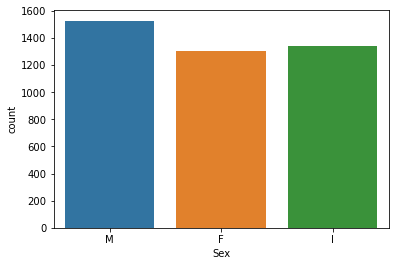

In [8]:
sns.countplot(data=df,x=df['Sex'])

THE INFORMATION RELATED TO MALE IS THE MOST,FOLLOWED BY INFANT AND FEMALE.

In [9]:
for i in df.columns:
    print(i)

Sex
Length
Diameter
Height
Whole weight
Shucked weight
Viscera weight
Shell weight
Rings


In [10]:
cols = df.columns[1:]

In [11]:
cols

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

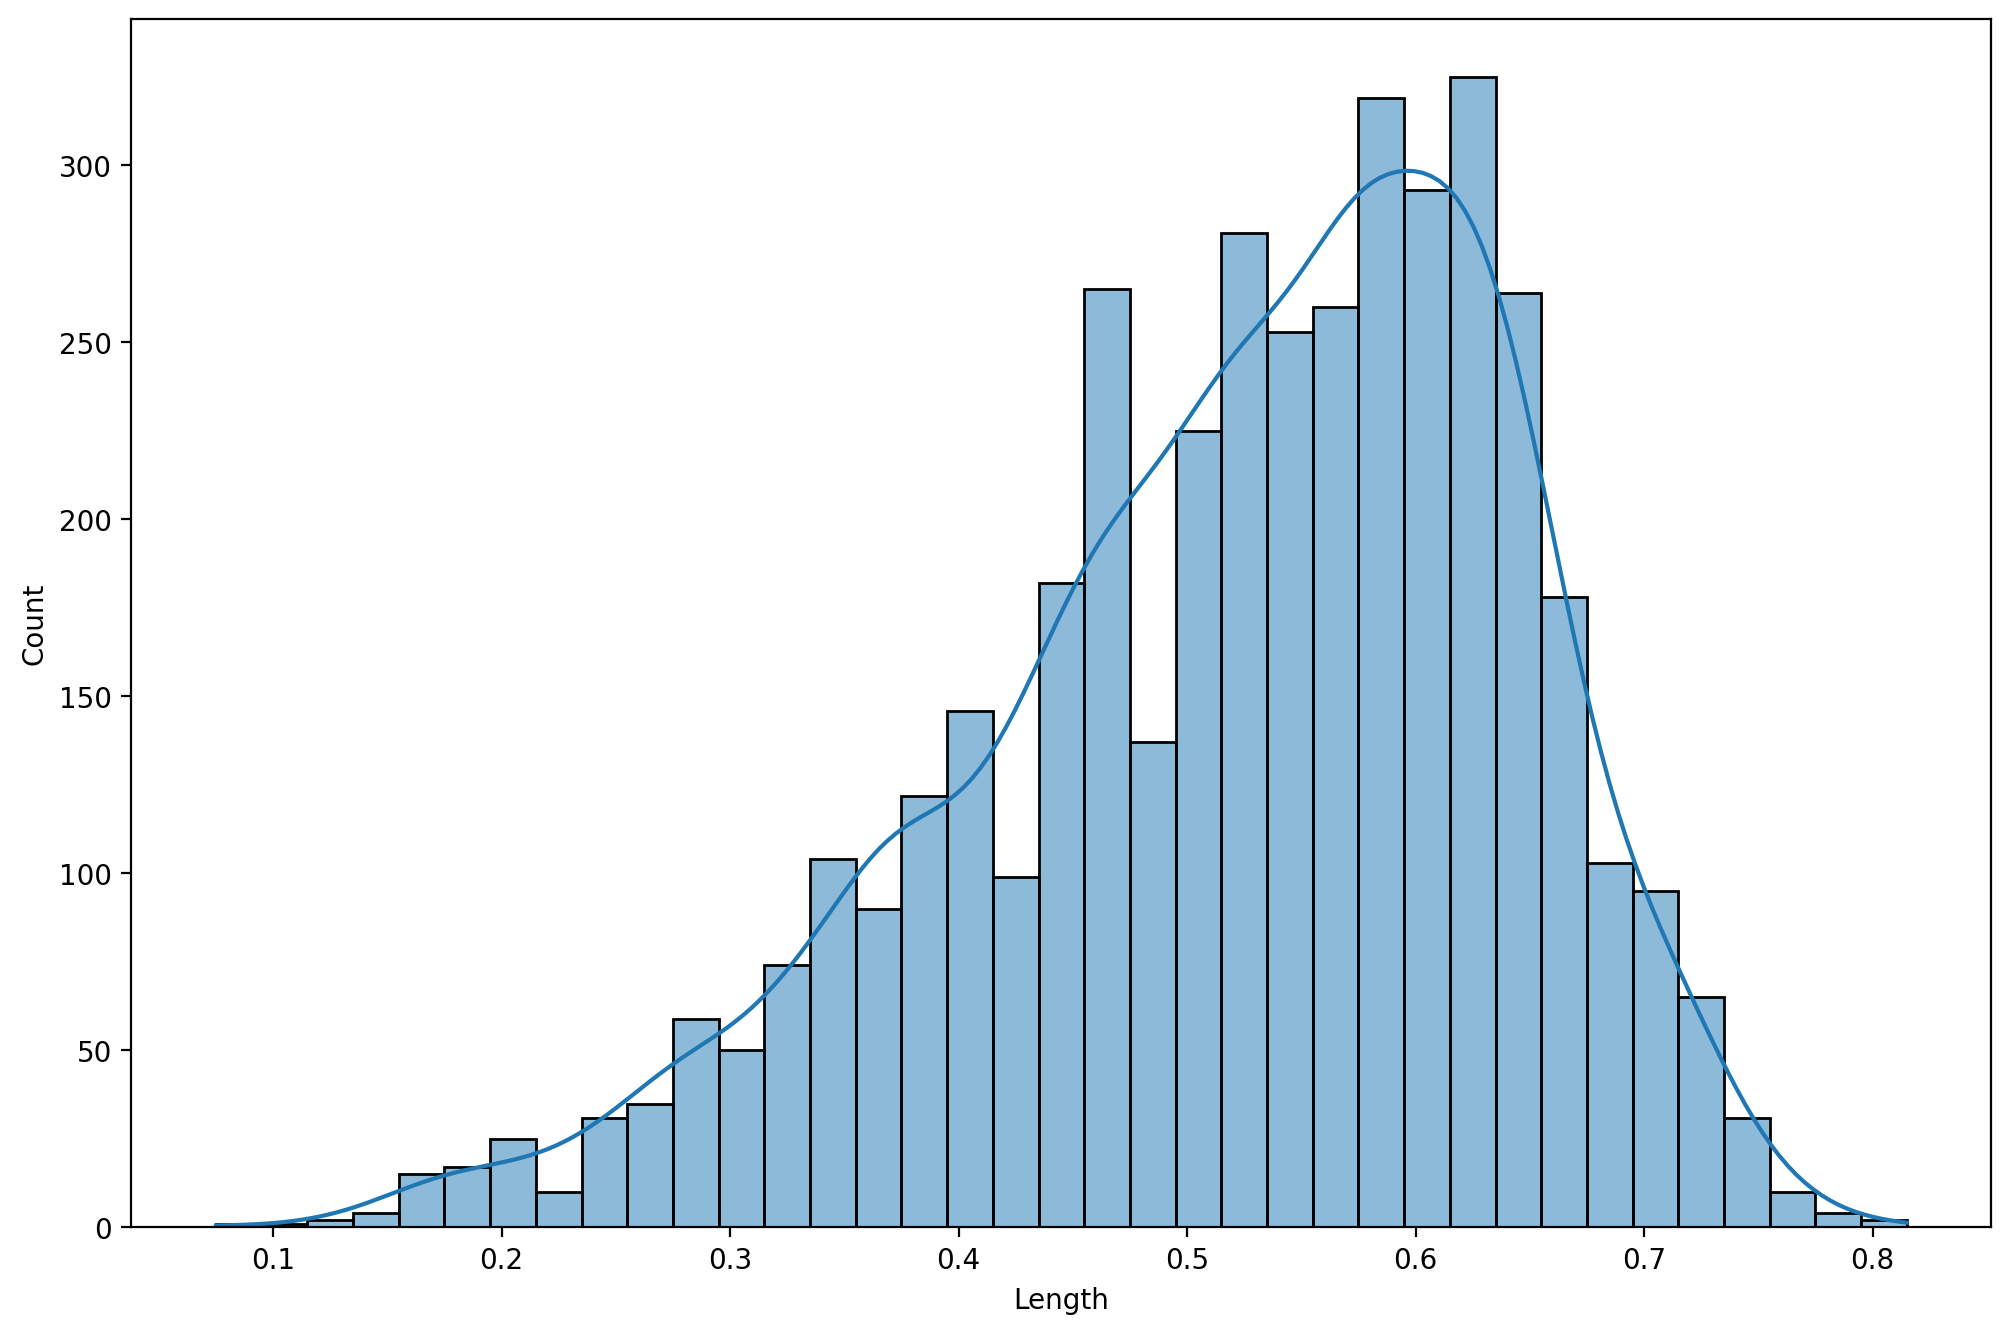

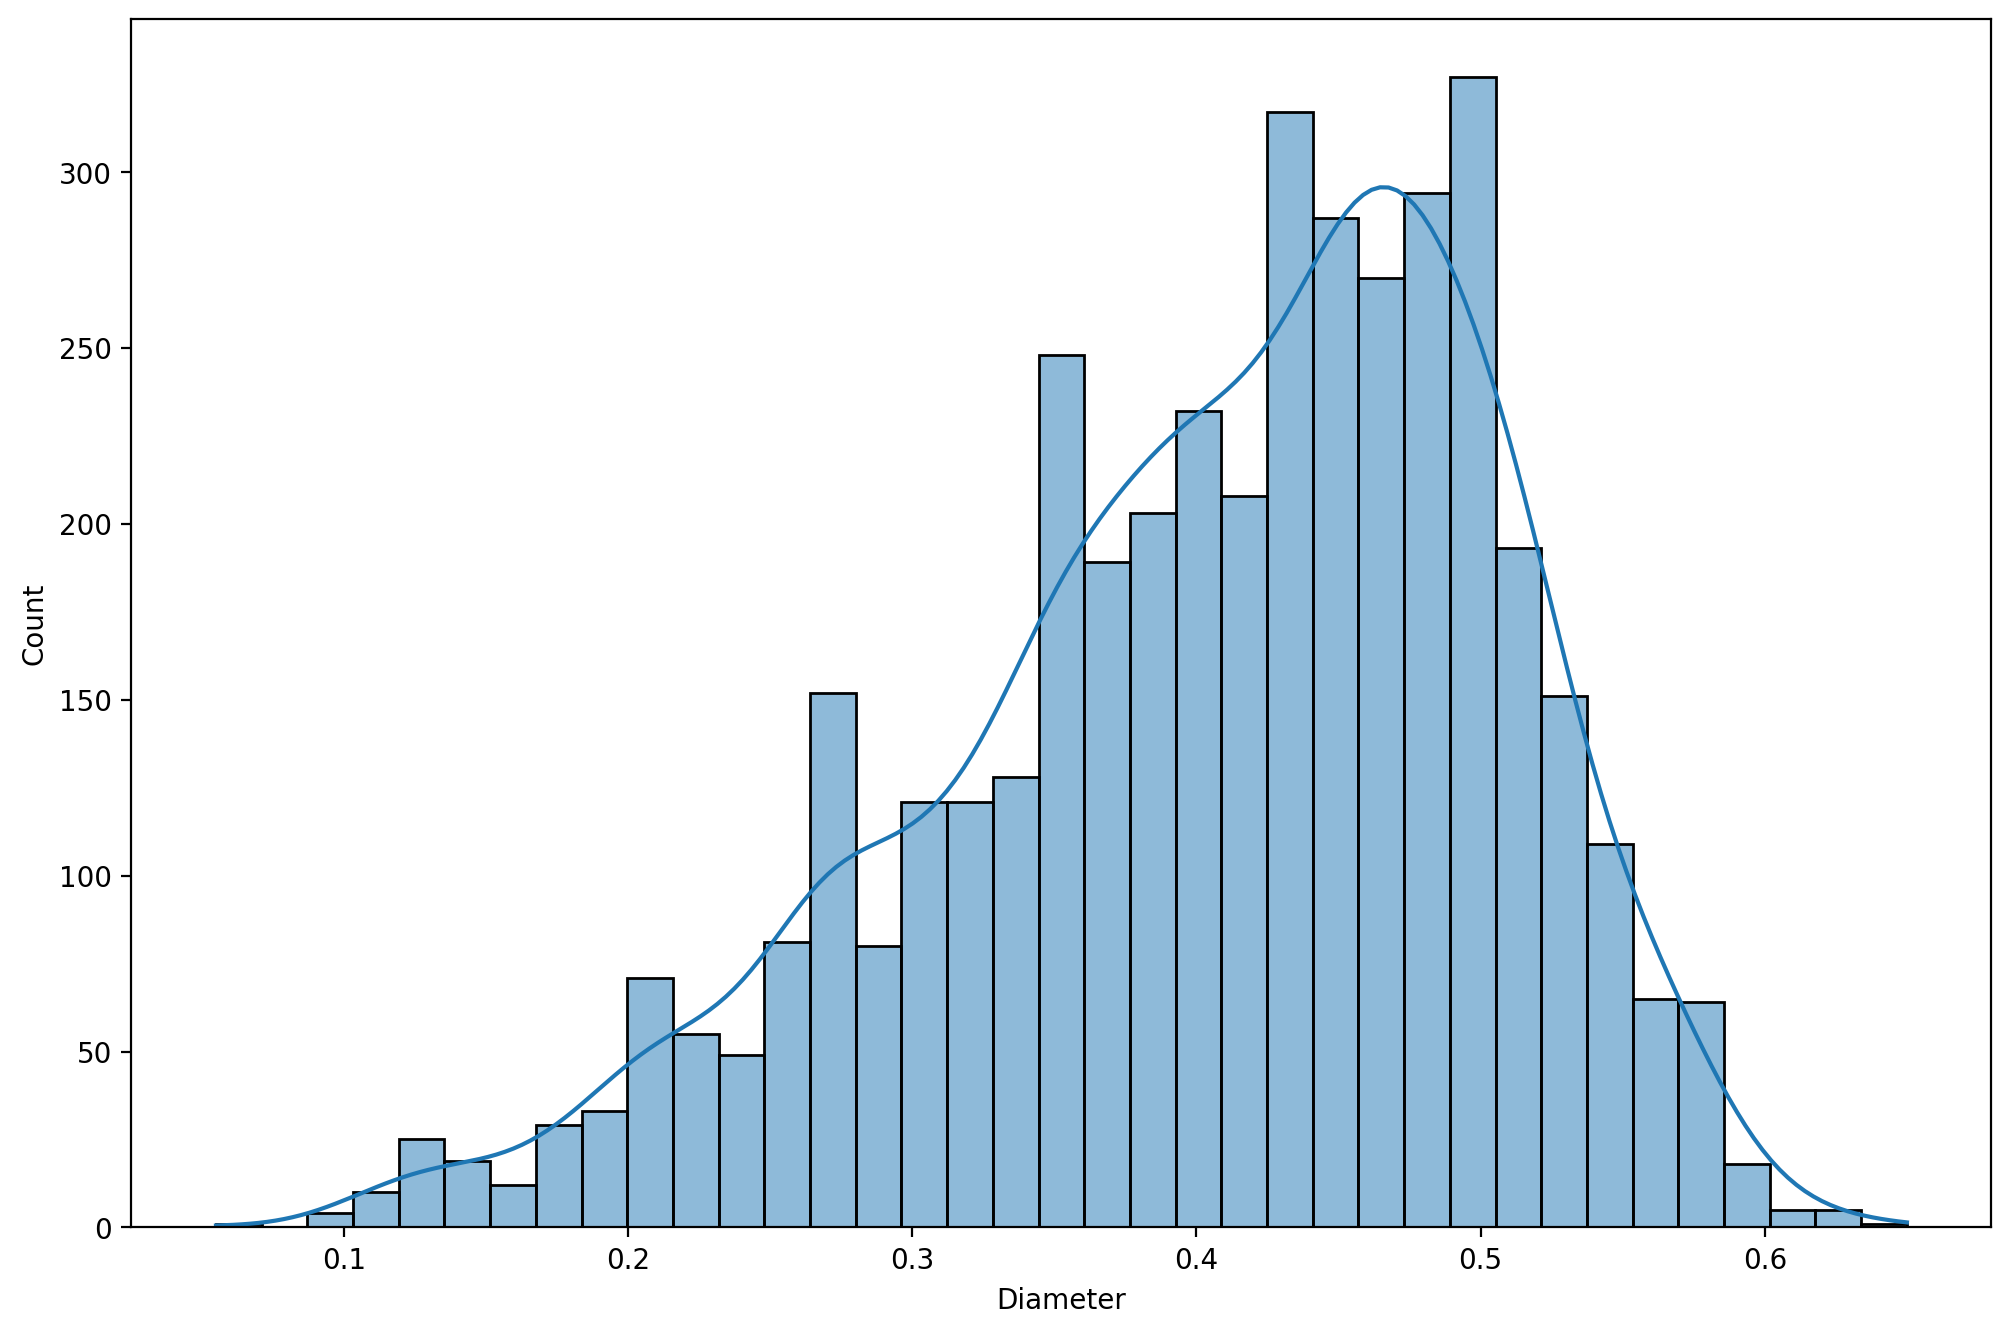

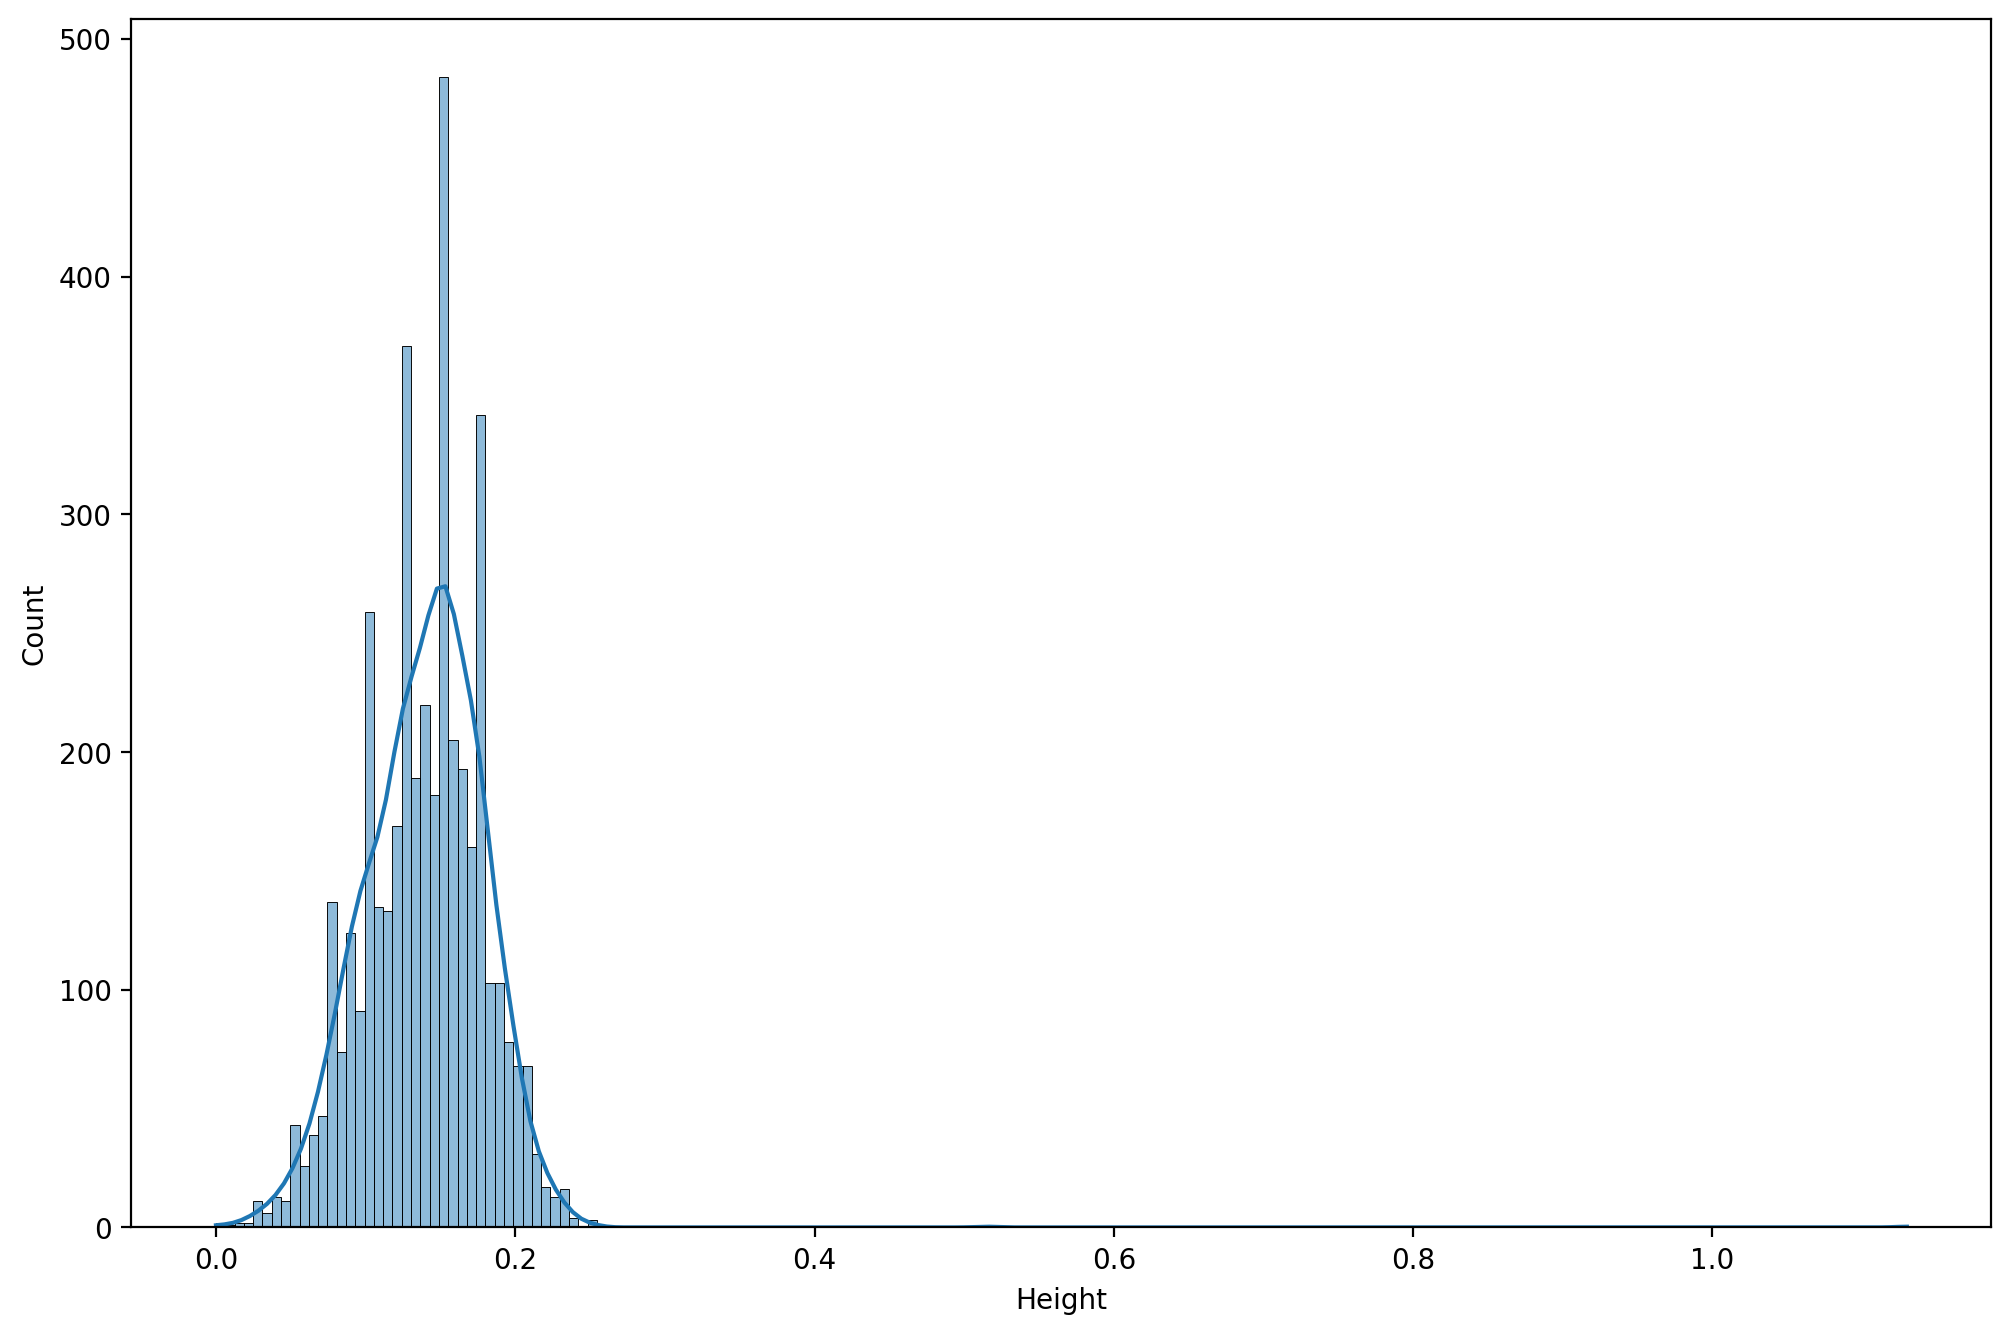

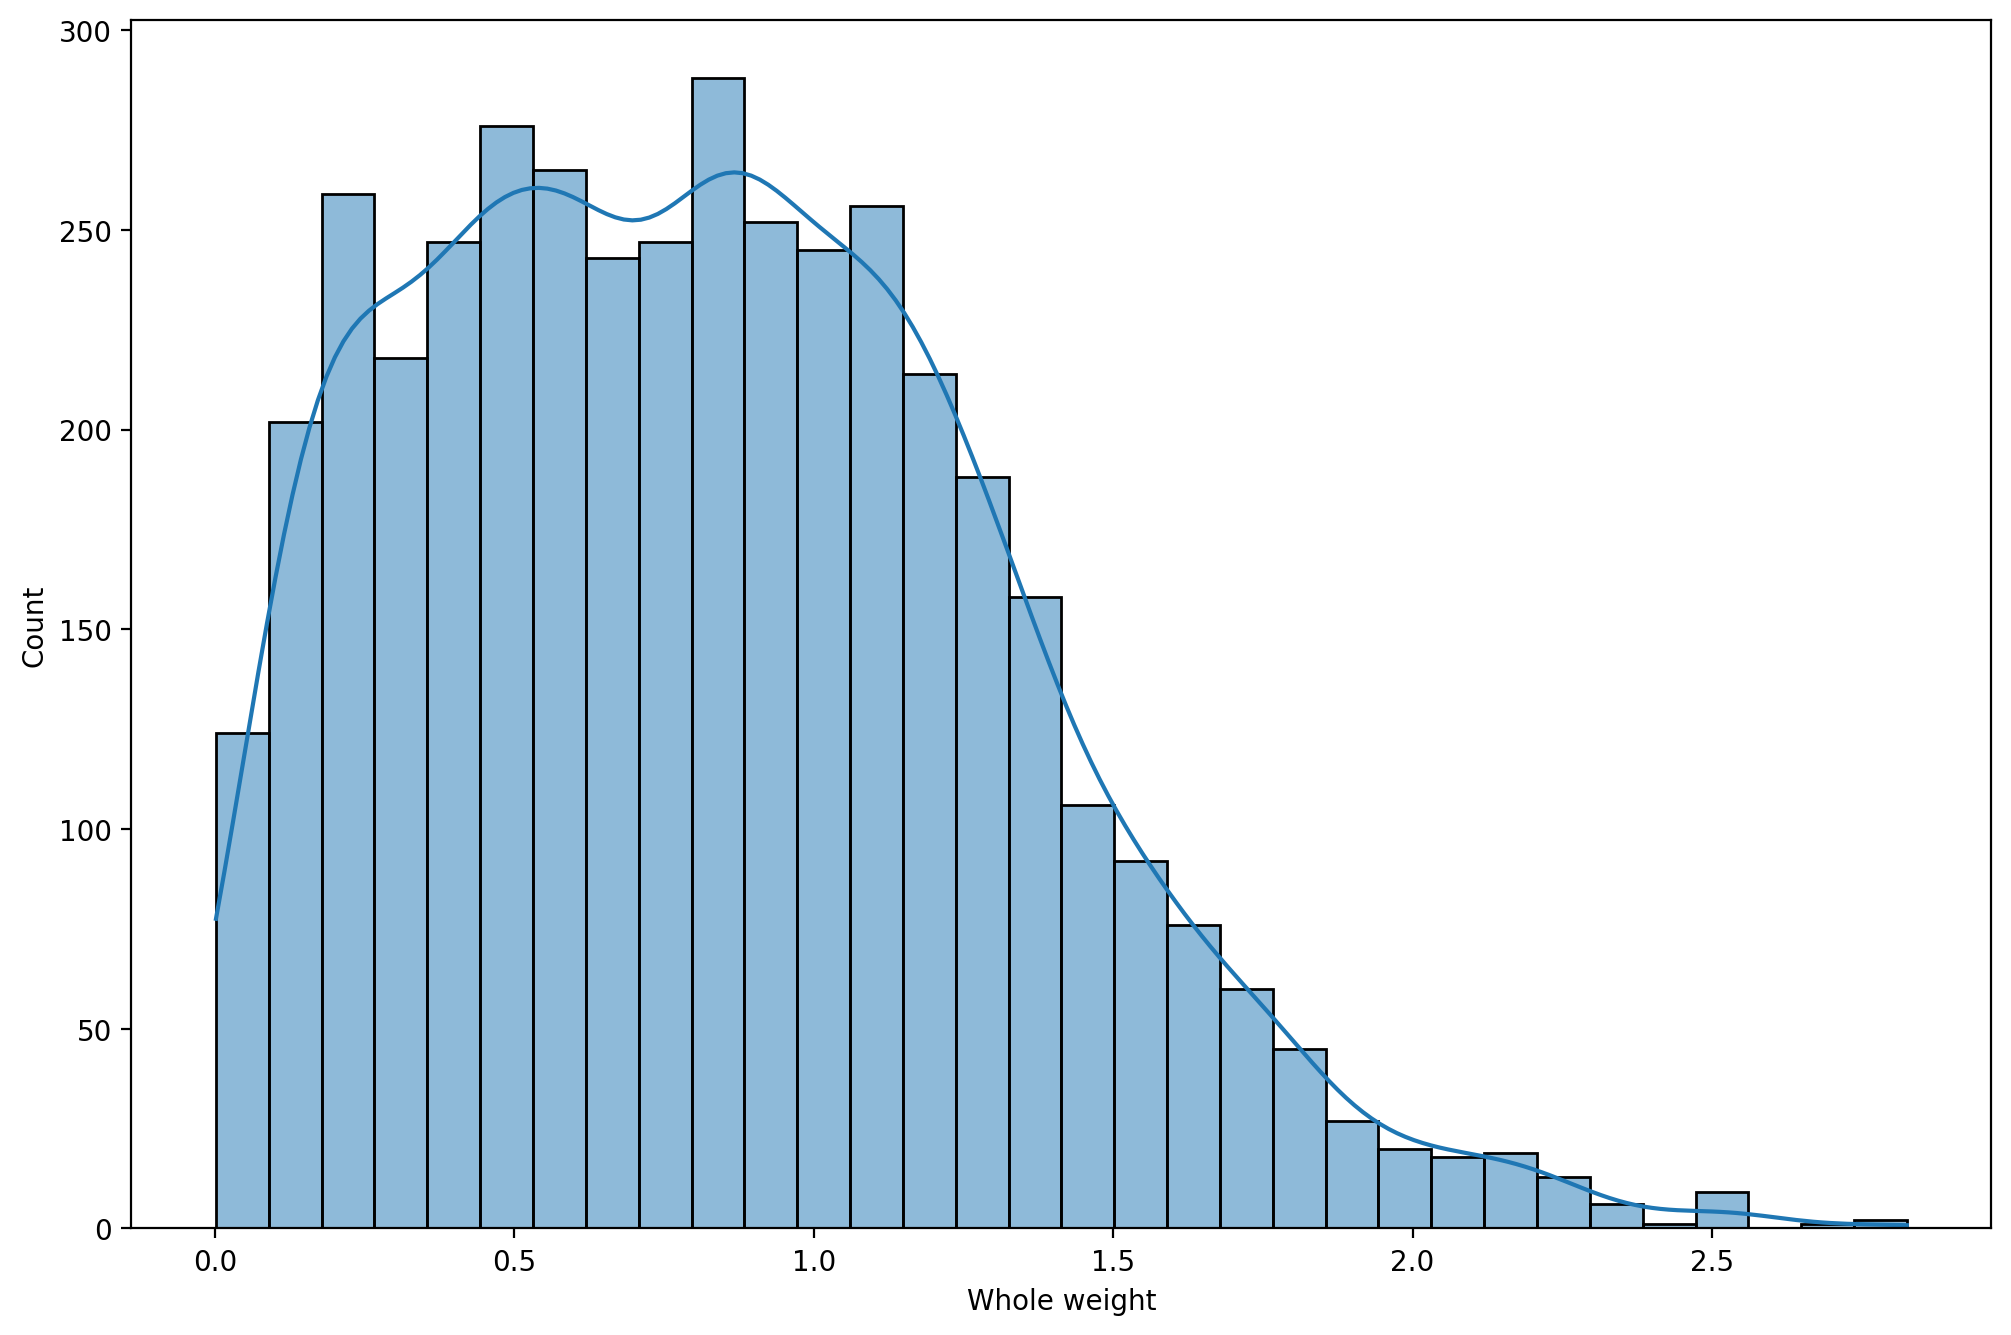

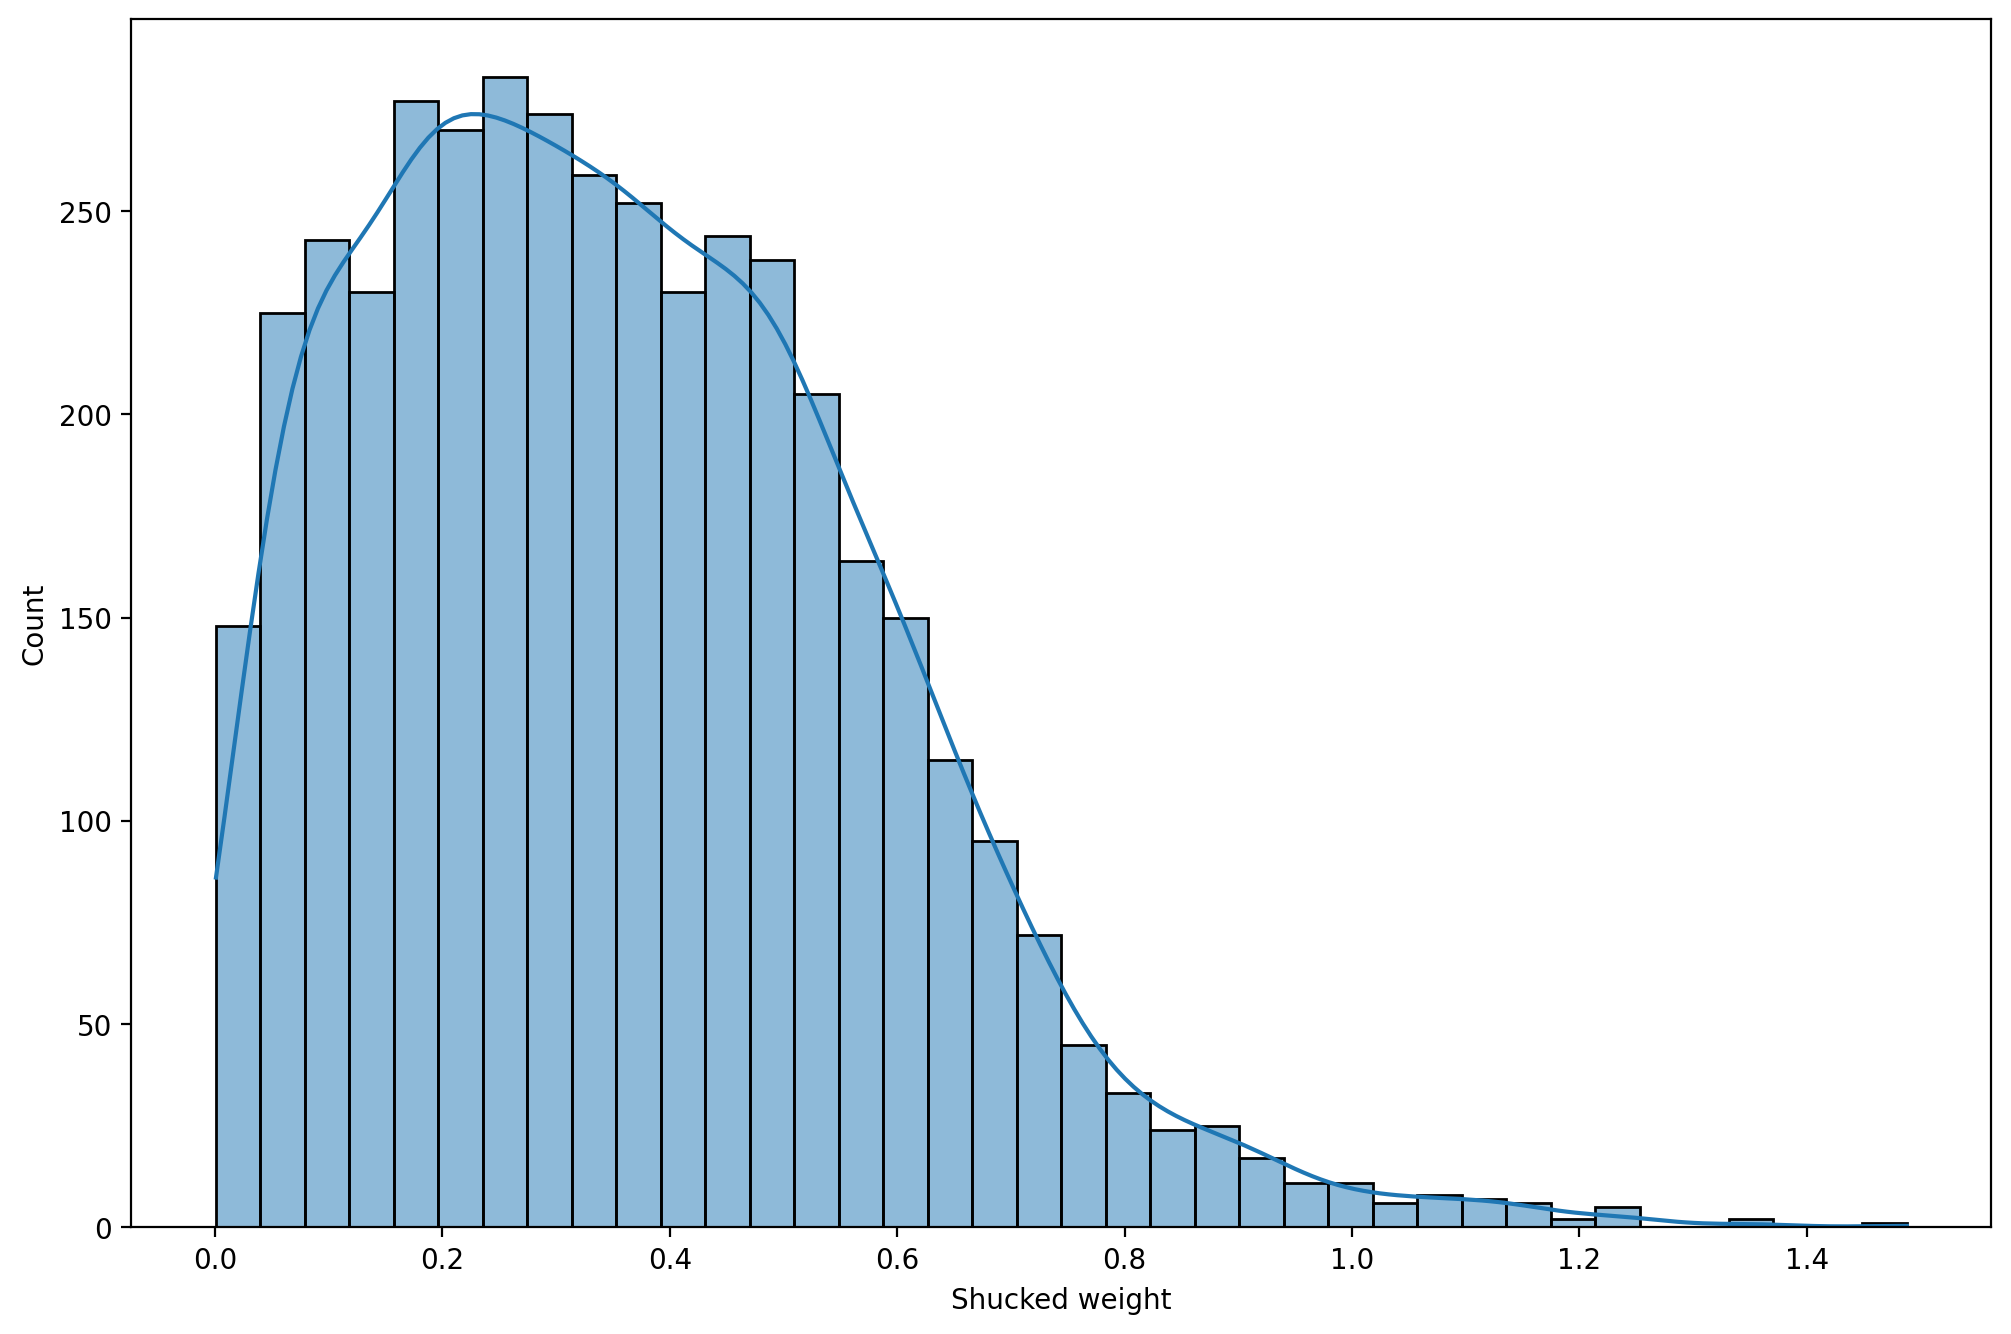

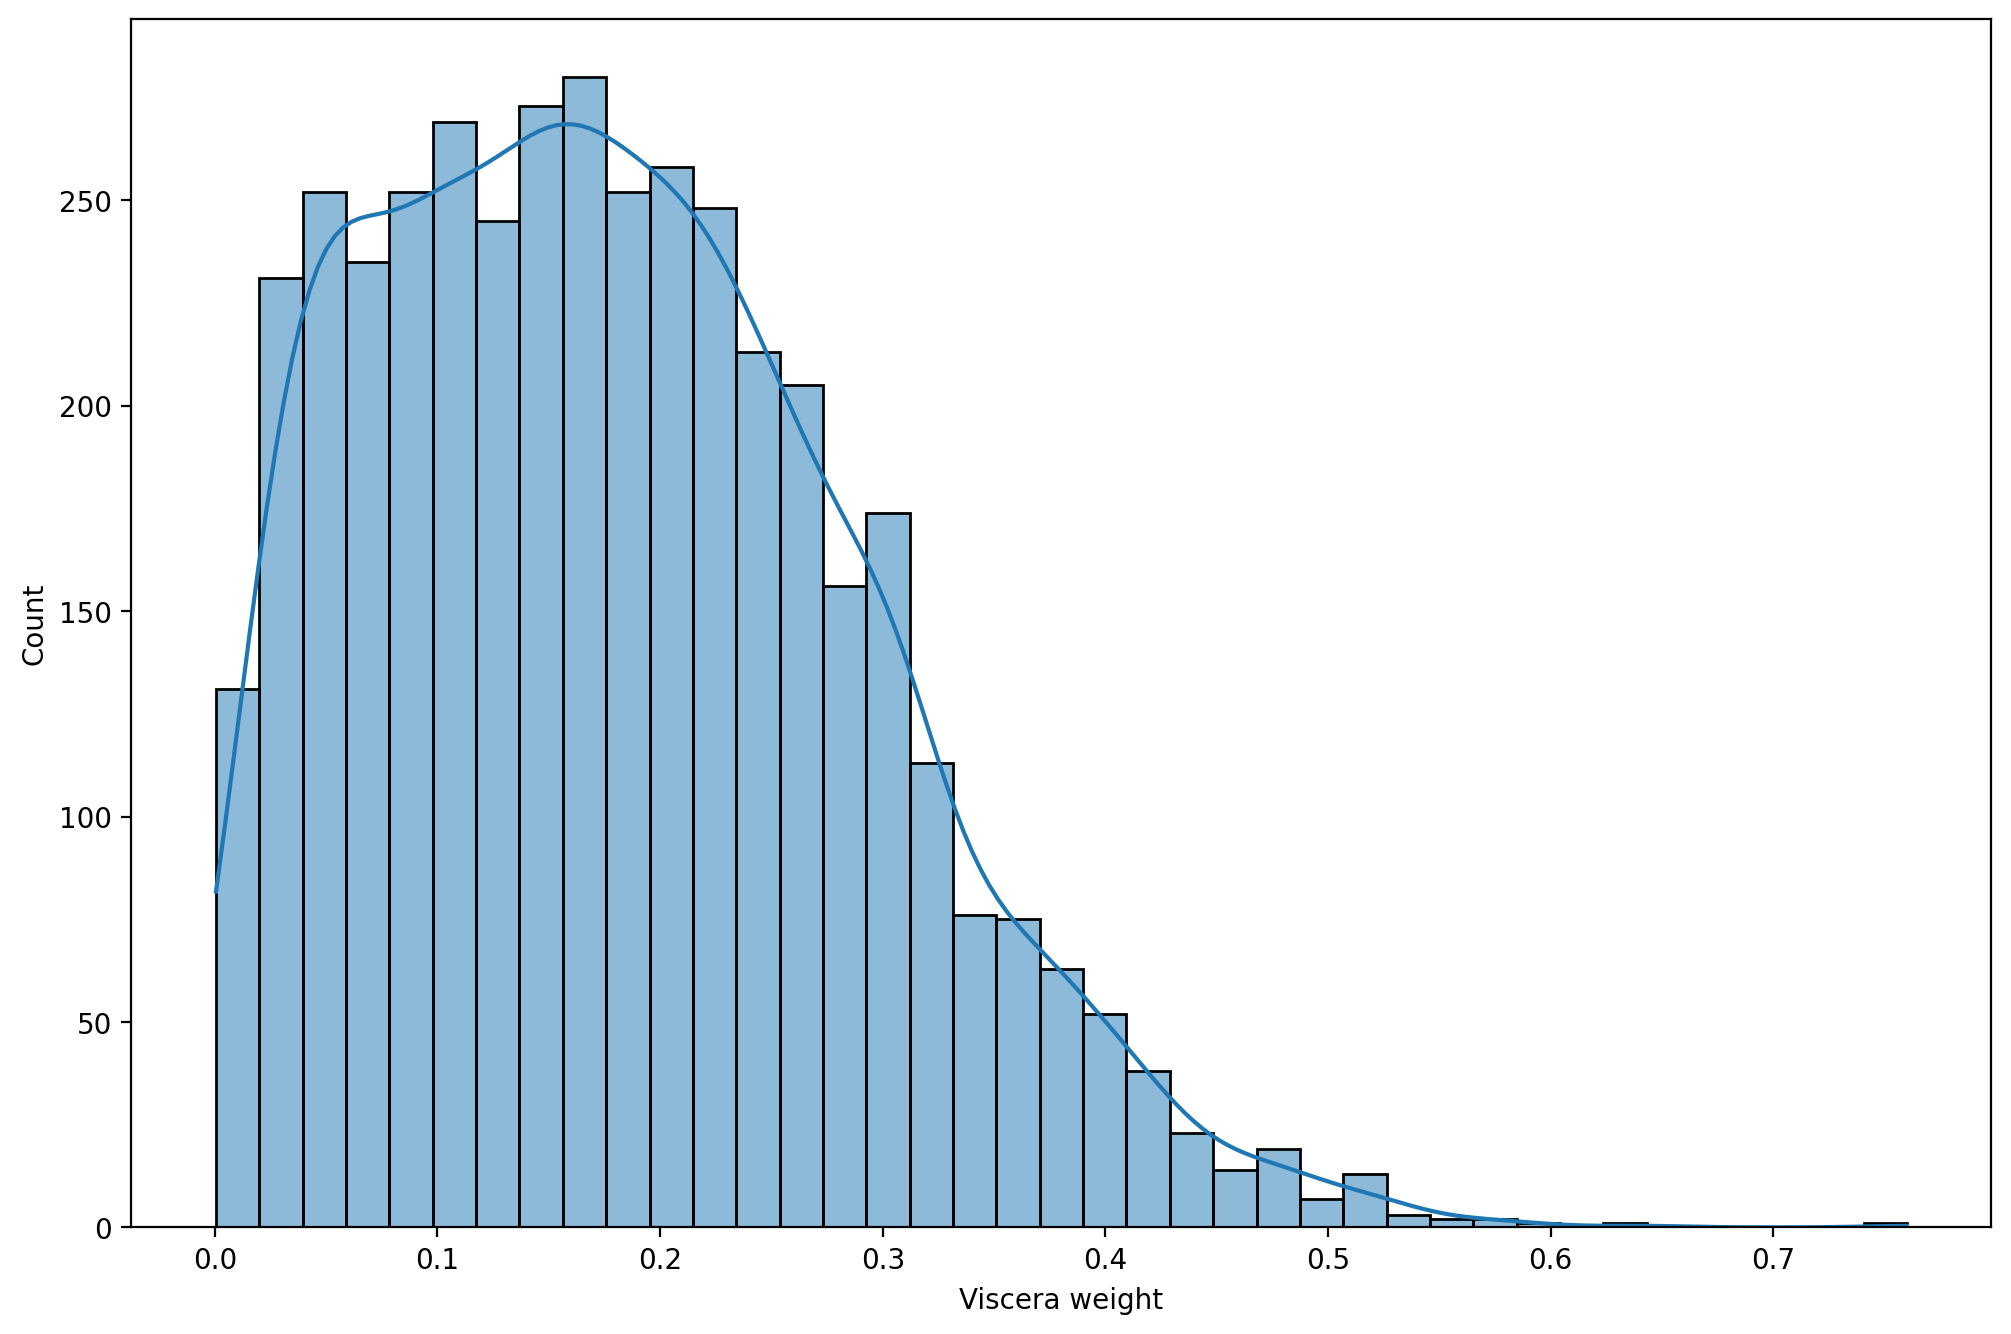

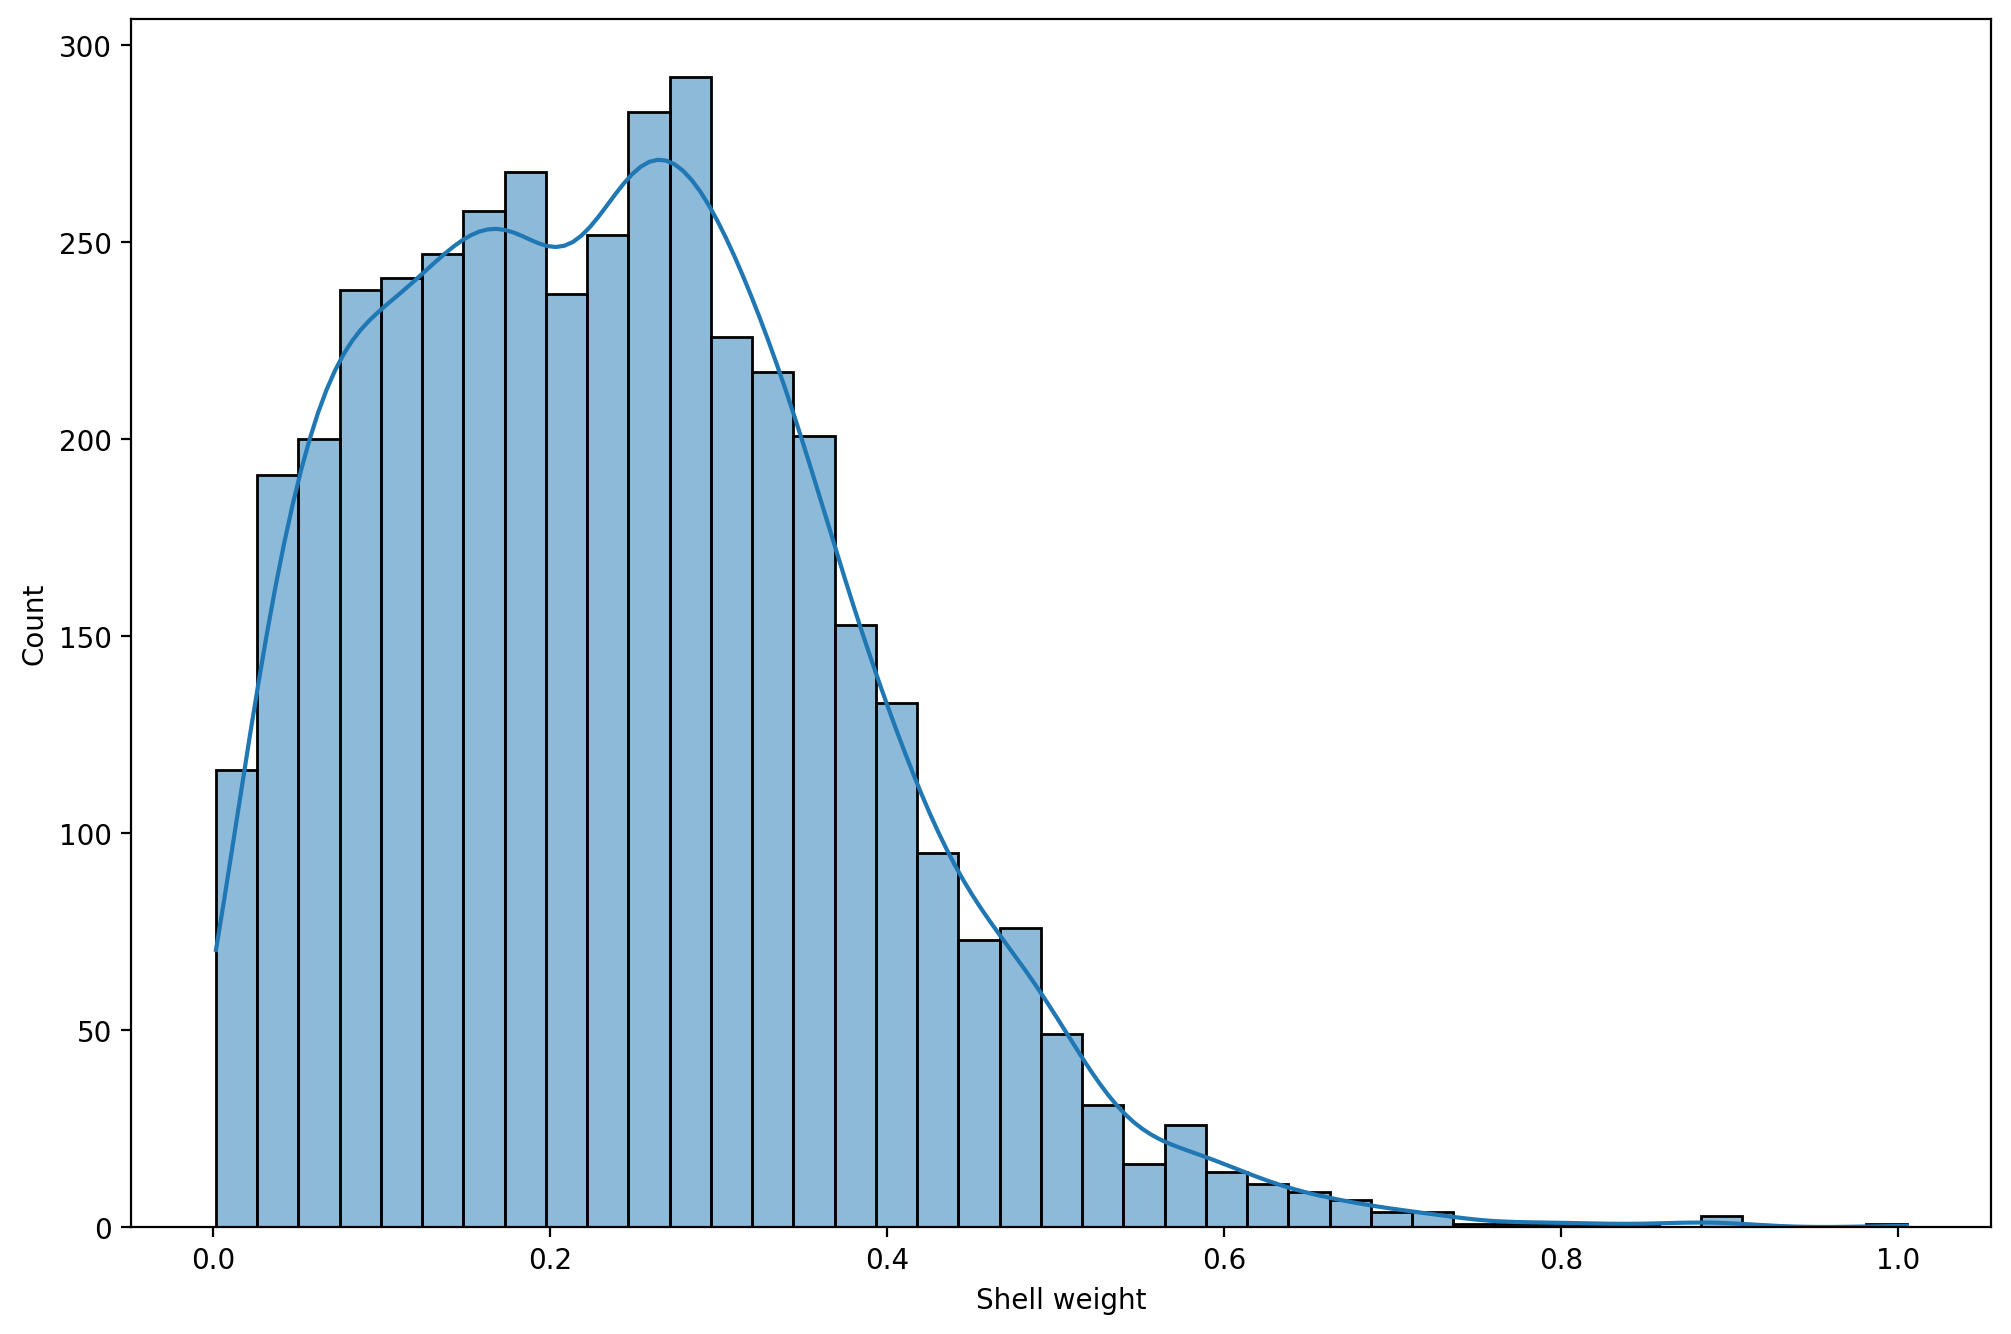

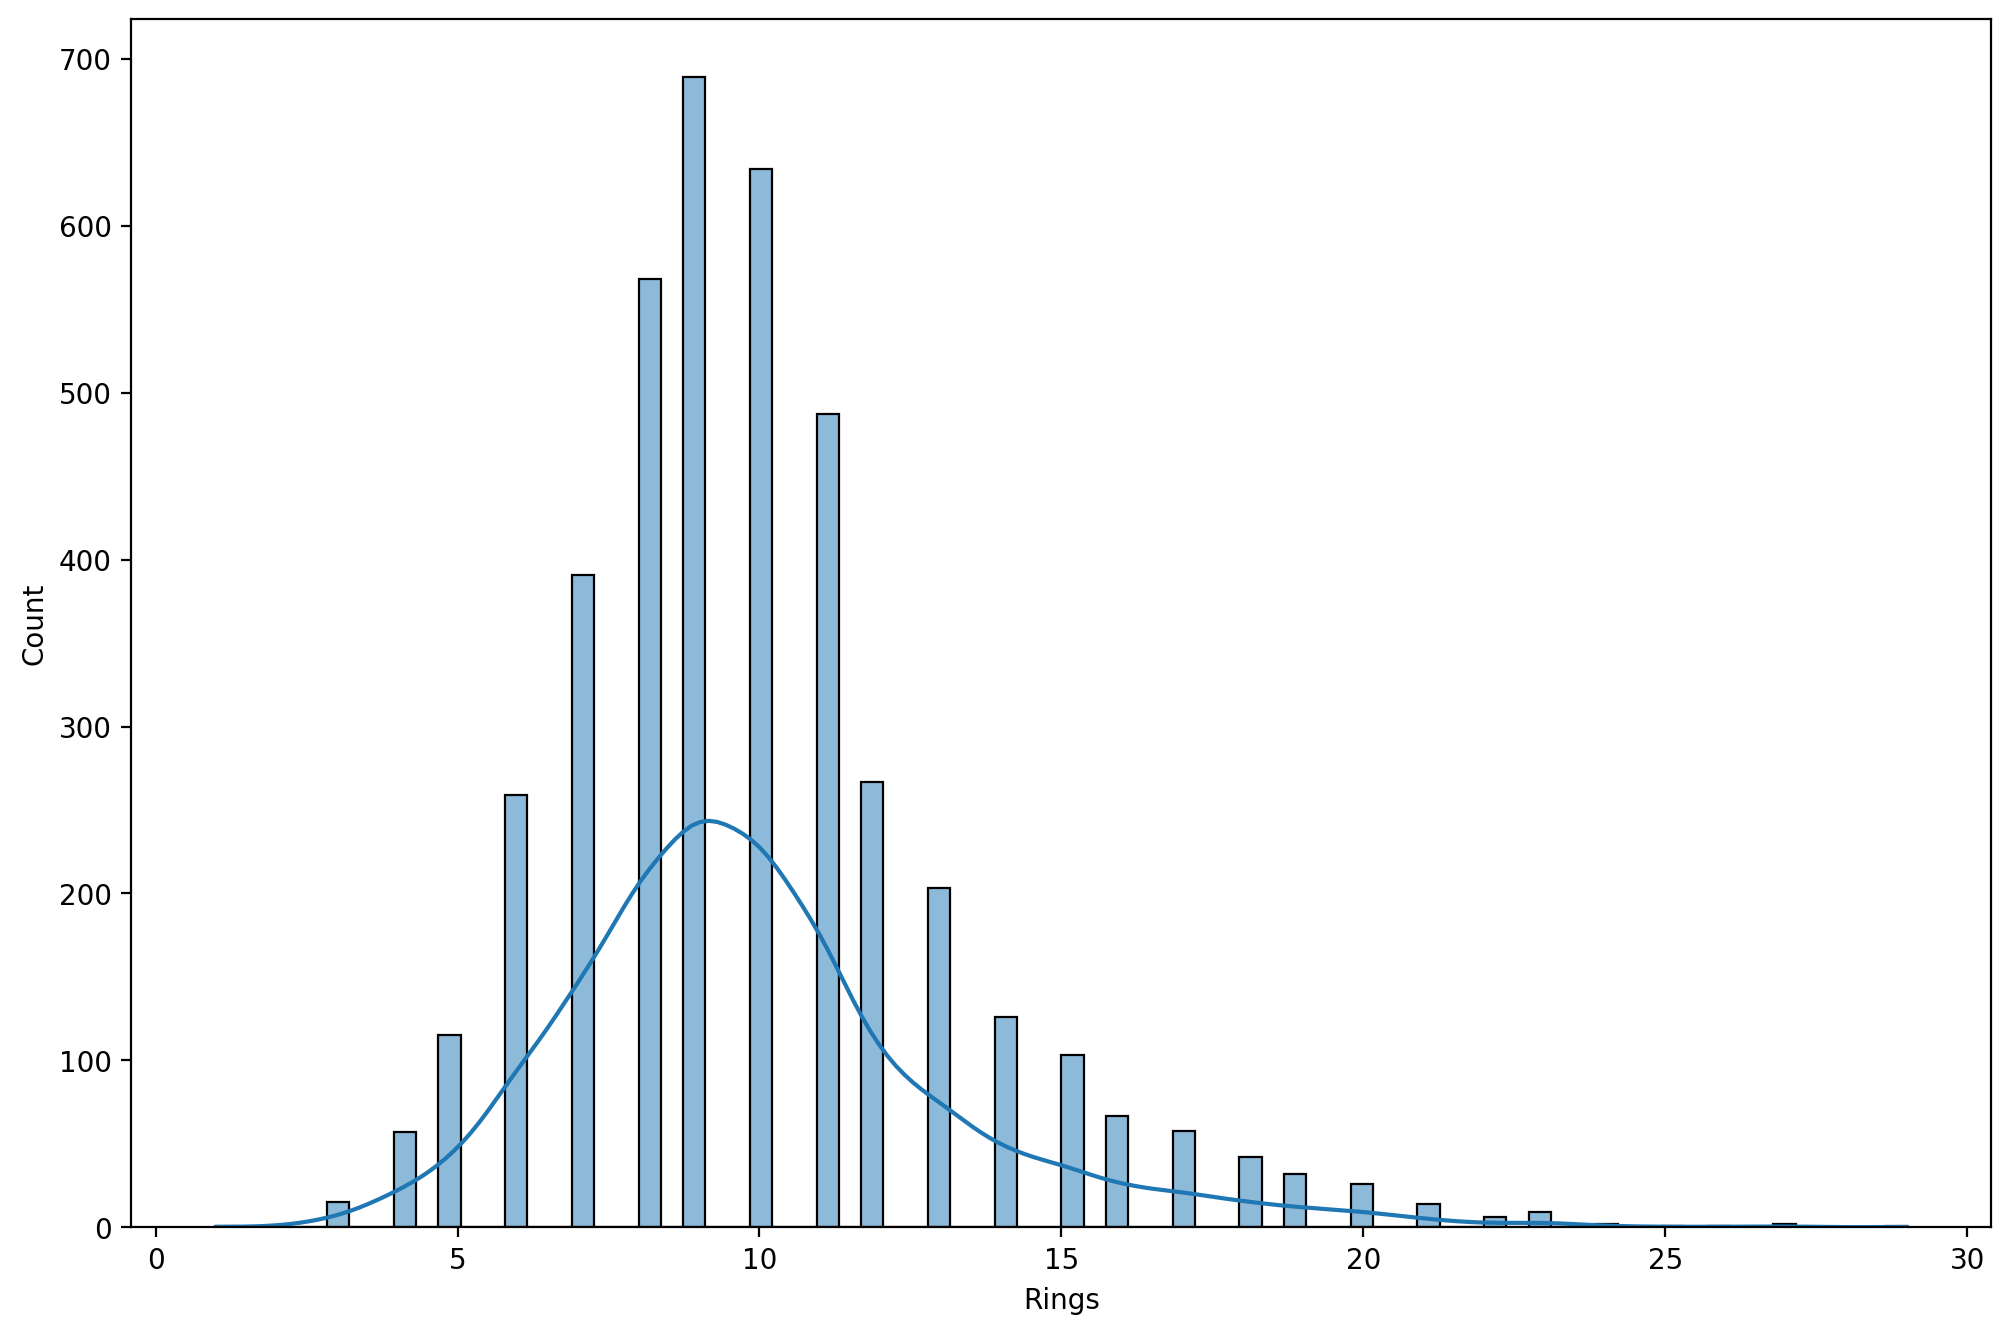

In [12]:
for k in cols:
    plt.figure(figsize=(12,8),dpi=200)
    sns.histplot(data=df,x=df[k],kde=True)

LEFT/NEGATIVELY SKEWED DATA DISTRIBUTIONS: LENGTH AND DIAMETER.
    
RIGHT/POSITIVELY SKEWED DATA DISTRIBUTIONS: 
Whole weight,
Shucked weight,
Viscera weight and
Shell weight.

HEIGHT AND RINGS COLUMNS SEEMS TO BE APPROXIMATELY MODERATELY SKEWED.

In [13]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

Encoded 'Sex' column so that it can be easy for analysis.

In [14]:
df['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [15]:
df['Sex'].unique()

array([2, 0, 1])

In [16]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [17]:
skew_data = df.skew()

In [18]:
skew_data

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [19]:
skew_data = skew_data.reset_index()

In [20]:
skew_data

,index,0
0,Sex,-0.098155
1,Length,-0.639873
2,Diameter,-0.609198
3,Height,3.128817
4,Whole weight,0.530959
5,Shucked weight,0.719098
6,Viscera weight,0.591852
7,Shell weight,0.620927
8,Rings,1.114102


In [21]:
skew_data.rename(columns={'index':'column_names',0:'skewness'},inplace=True)

In [22]:
skew_data

,column_names,skewness
0,Sex,-0.098155
1,Length,-0.639873
2,Diameter,-0.609198
3,Height,3.128817
4,Whole weight,0.530959
5,Shucked weight,0.719098
6,Viscera weight,0.591852
7,Shell weight,0.620927
8,Rings,1.114102


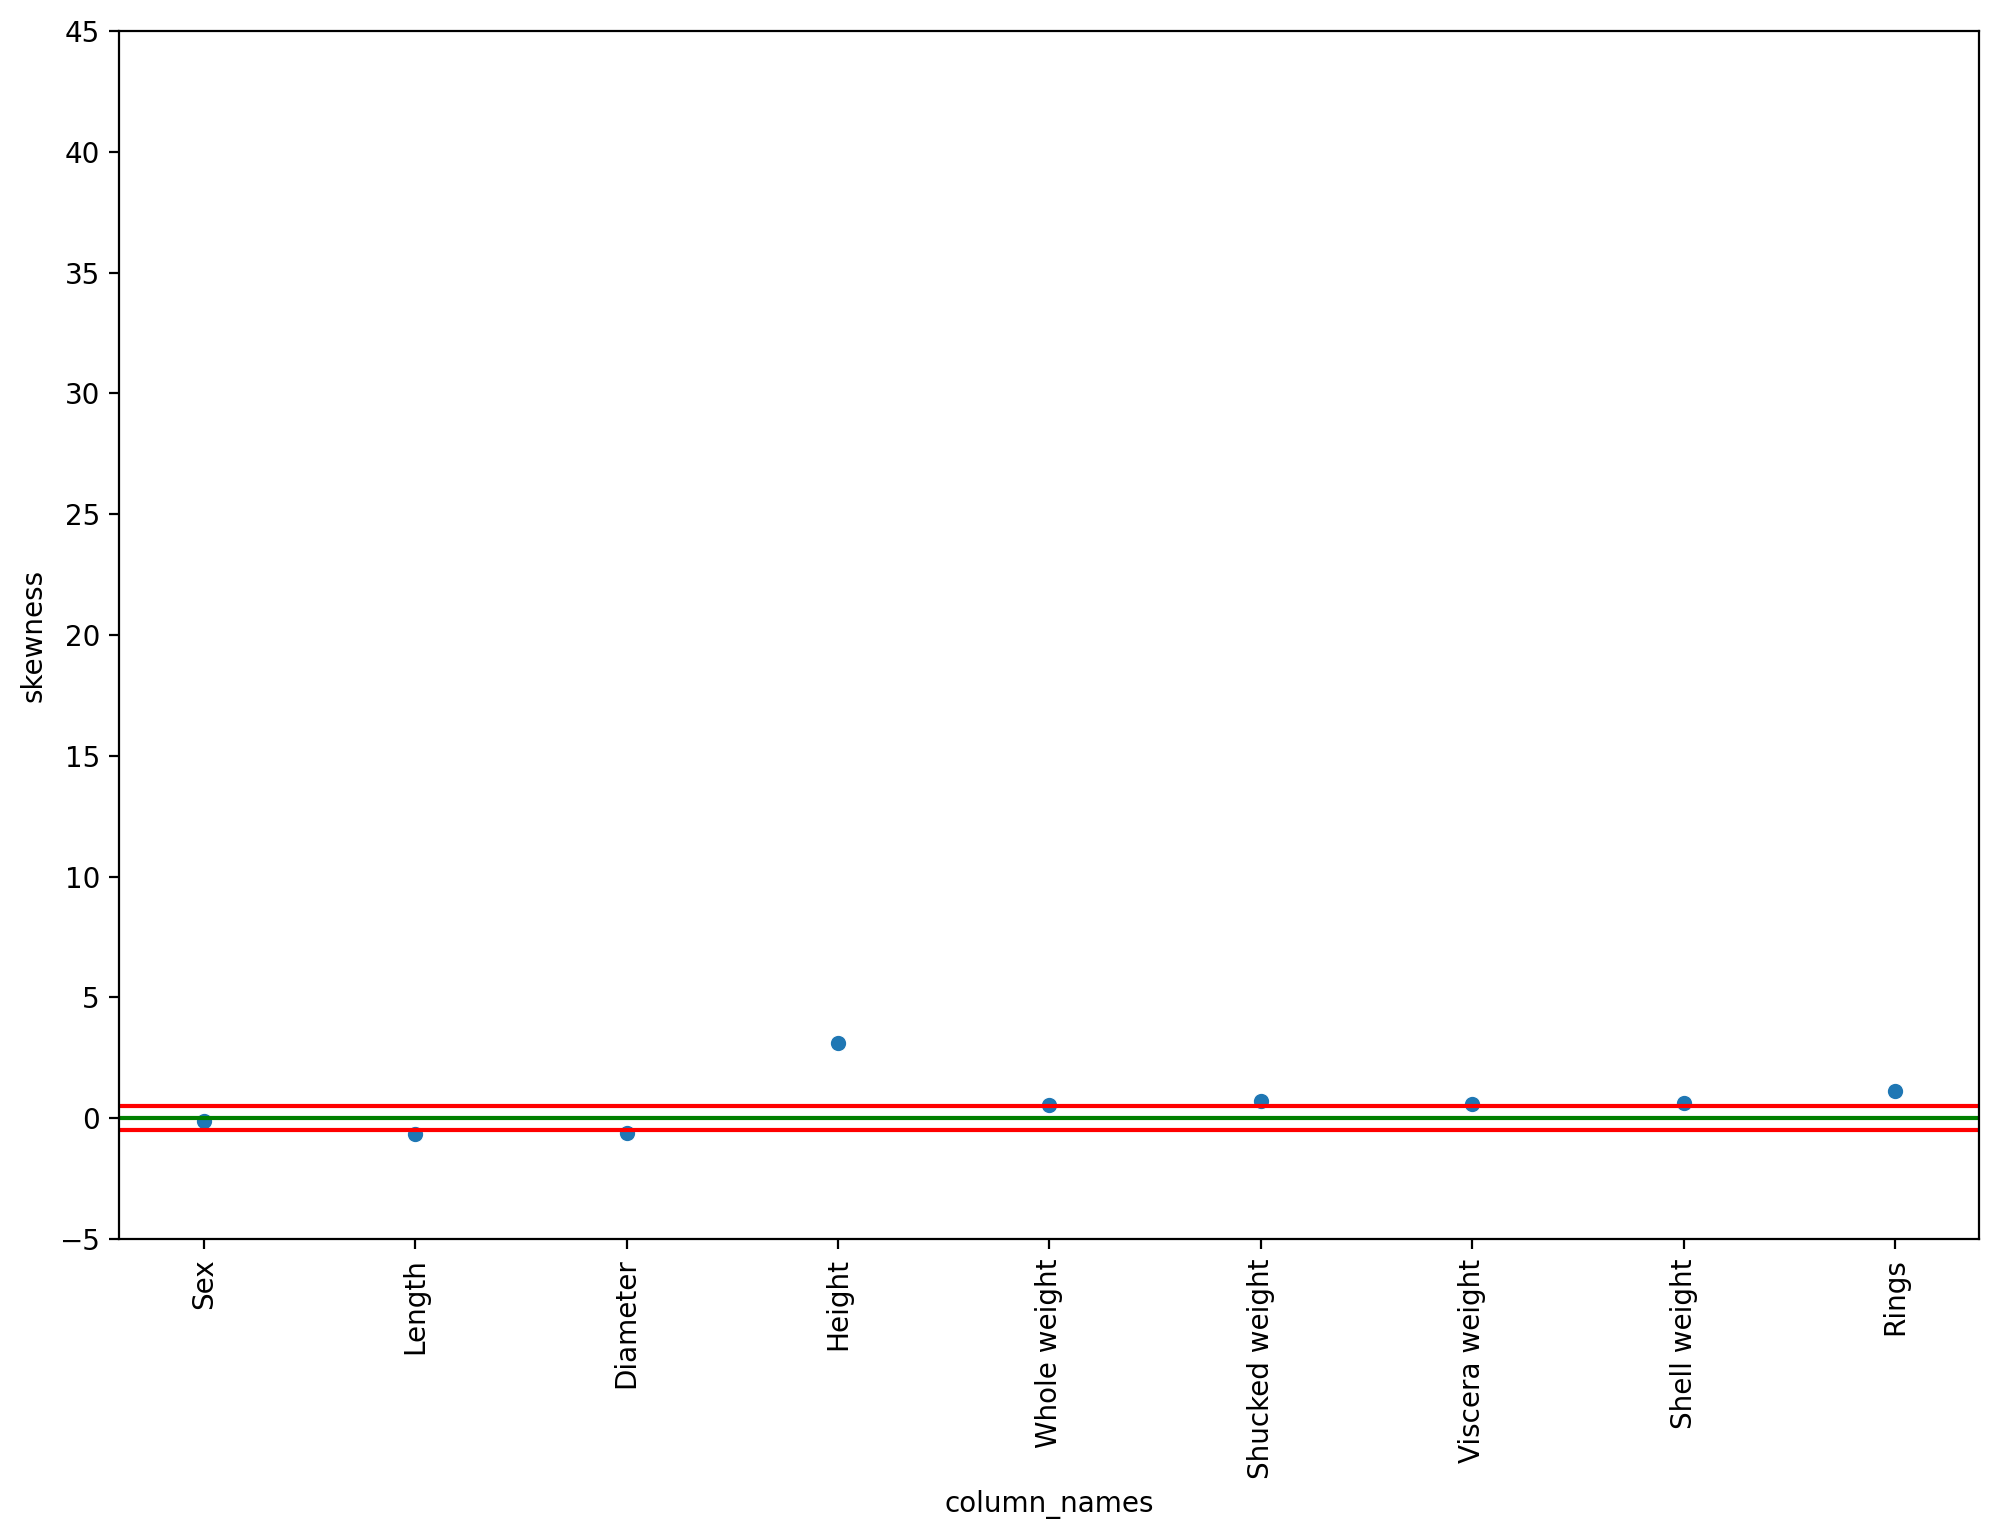

In [23]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skew_data,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 50, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');


SKEWNESS CHECK AND OBSERVATIONS:- PLOTTED SKEWNESS FOR ALL DATA DISTRIBUTIONS AGAINST COLUMNS OF THE DATA. PLOTTED GREEN HORIZONTAL LINE FOR A SKEWNESS OF ZERO(NORMAL DISTRIBUTION HAS ASKEWNESS OF 0). PLOTTED RED LINES AROUND THE GREEN LINE DENOTING A RANGE OF(-0.5,0.5). IF DATA POINTS FALL WITHIN THE ABOVE MENTIONED RANGE,THEN THEY ARE APPROXIMATELY NORMALLY DISTRIBUTED .

FOUND NO DATA POINTS WITHIN THE RANGE. ALL THE DATA POINTS ARE HIGHLY SKEWED. The rule for skewness seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data are moderately skewed.

Skewness of the normal distribution is zero. All the dataset columns seem to have a skewness of more than 0.5 (except for the label) and even more than 1,so they all are highly skewed.They all have a right-skewed data or a positively-skewed data curve since the right tail is longer and mass of the distribution is concentrated on the left of the figure.


HEIGHT COLUMN AND RINGS COLUMN SEEMS TO BE HIGHLY SKEWED.

Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. Finally, a value of zero indicates no relationship between the two variables x and y.

<AxesSubplot:>

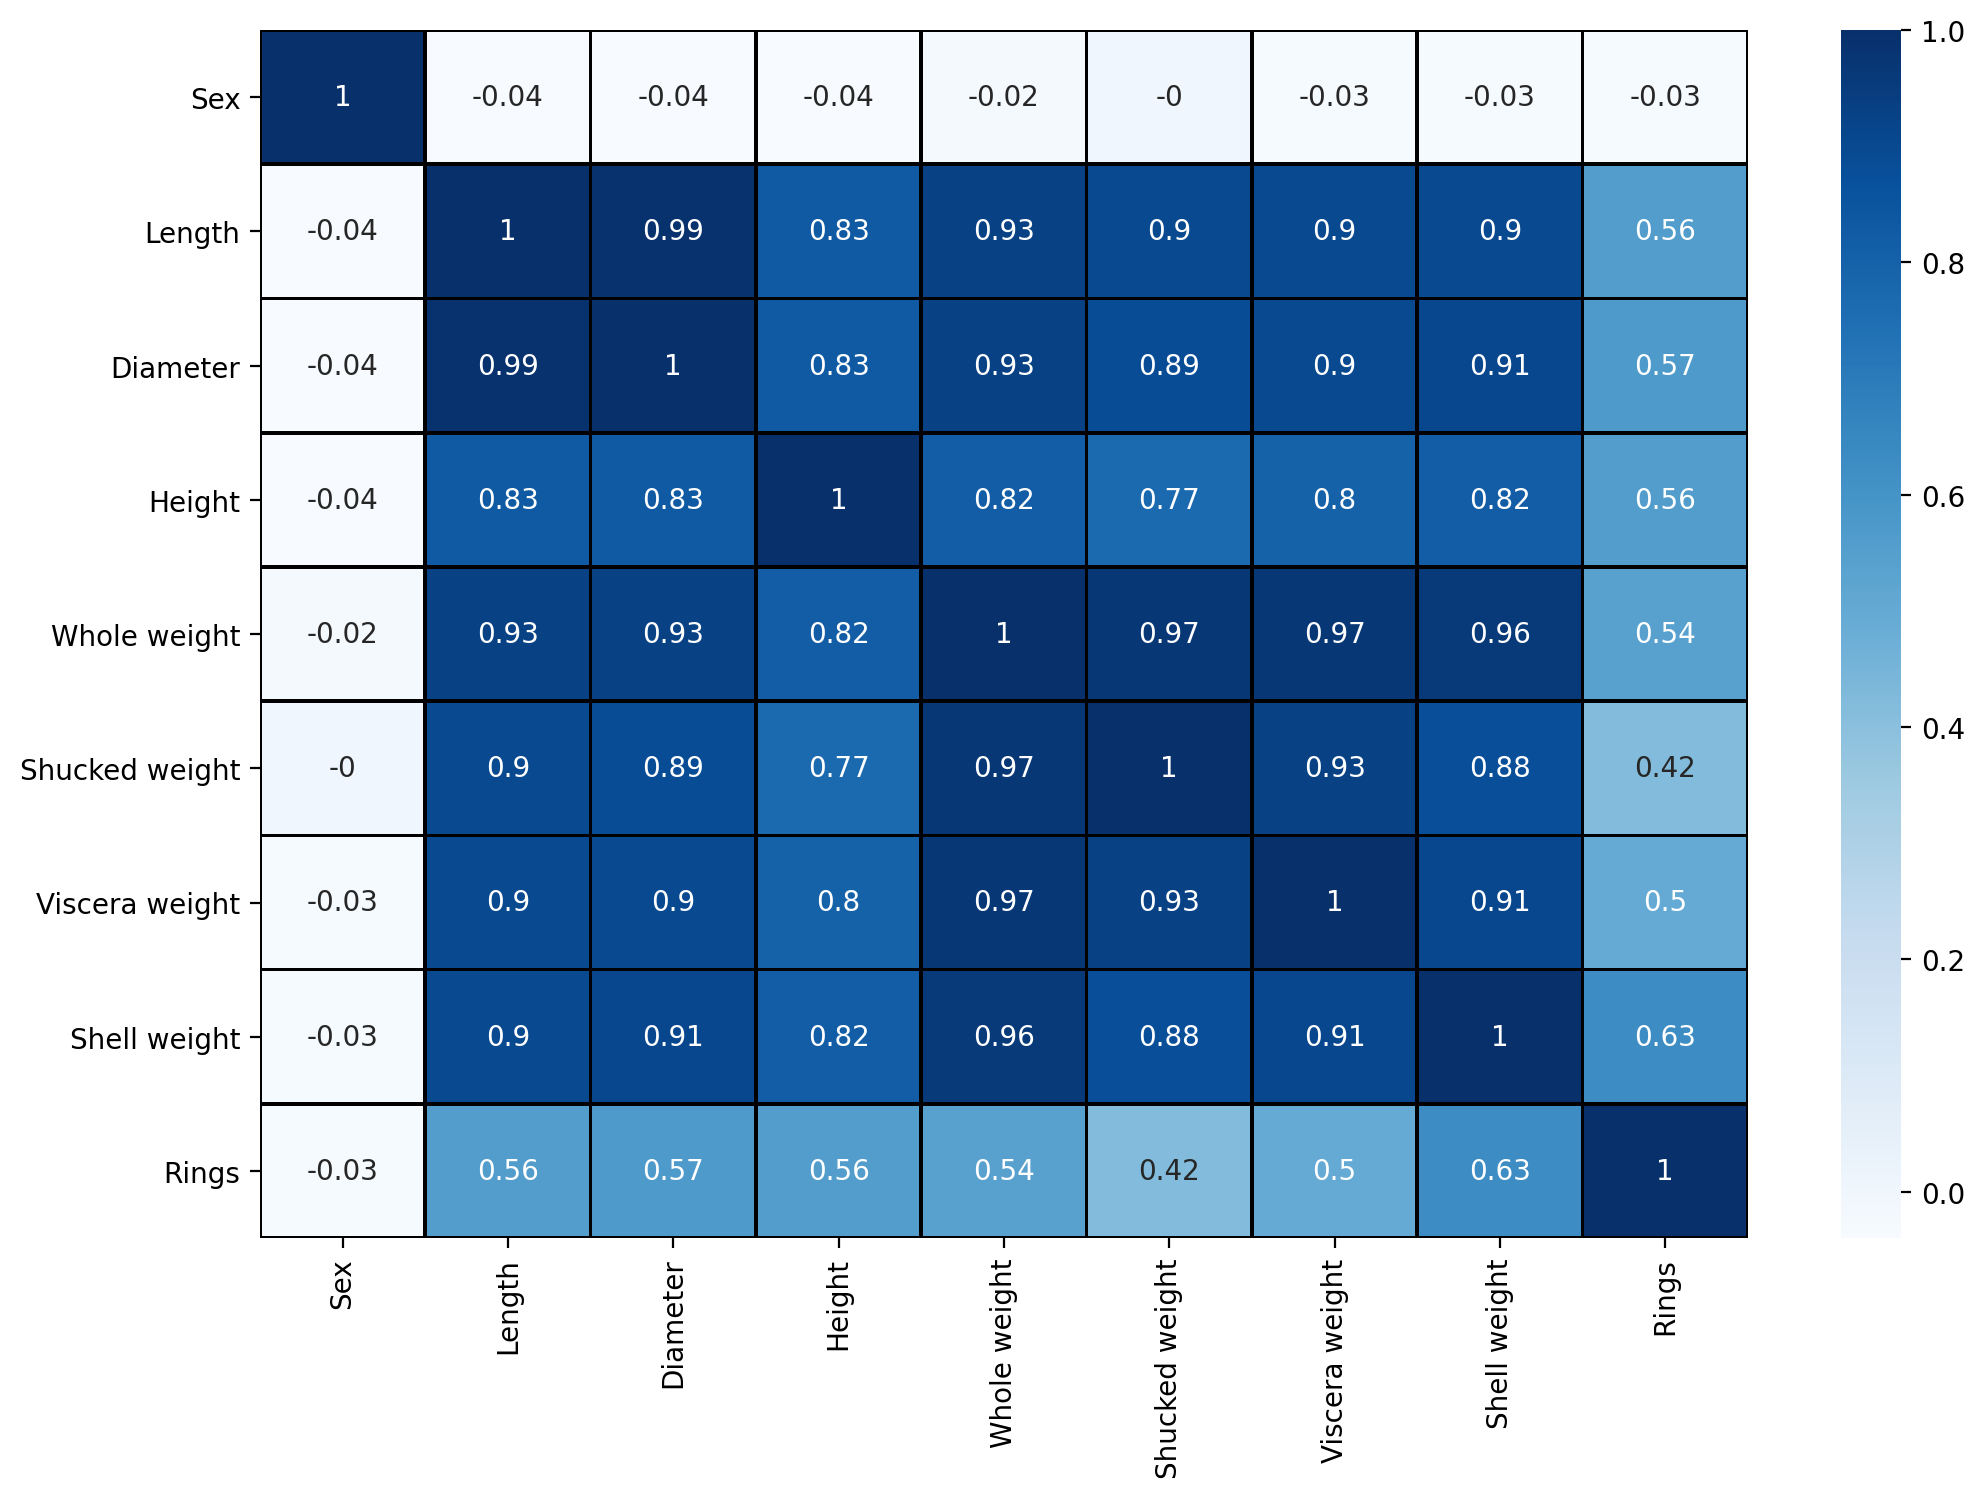

In [24]:
dfc=round(df.corr(),2)
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc,cmap='Blues',linewidth=1,linecolor='black',annot=True)

Correlation tells us about how strong the relationship is between the numerical variables of the dataset.It is in the range of(-1,1).

In [25]:
# columns having strong positive correlation is denoted as dfc_strong_positive.:--
dfc_strong_positive=dfc[(dfc>0.5)]
dfc_strong_positive

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,NaN,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,NaN,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,NaN,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,NaN,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,NaN,0.90,0.89,0.77,0.97,1.00,0.93,0.88,NaN
Viscera weight,NaN,0.90,0.90,0.80,0.97,0.93,1.00,0.91,NaN
Shell weight,NaN,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,NaN,0.56,0.57,0.56,0.54,NaN,NaN,0.63,1.00


<AxesSubplot:>

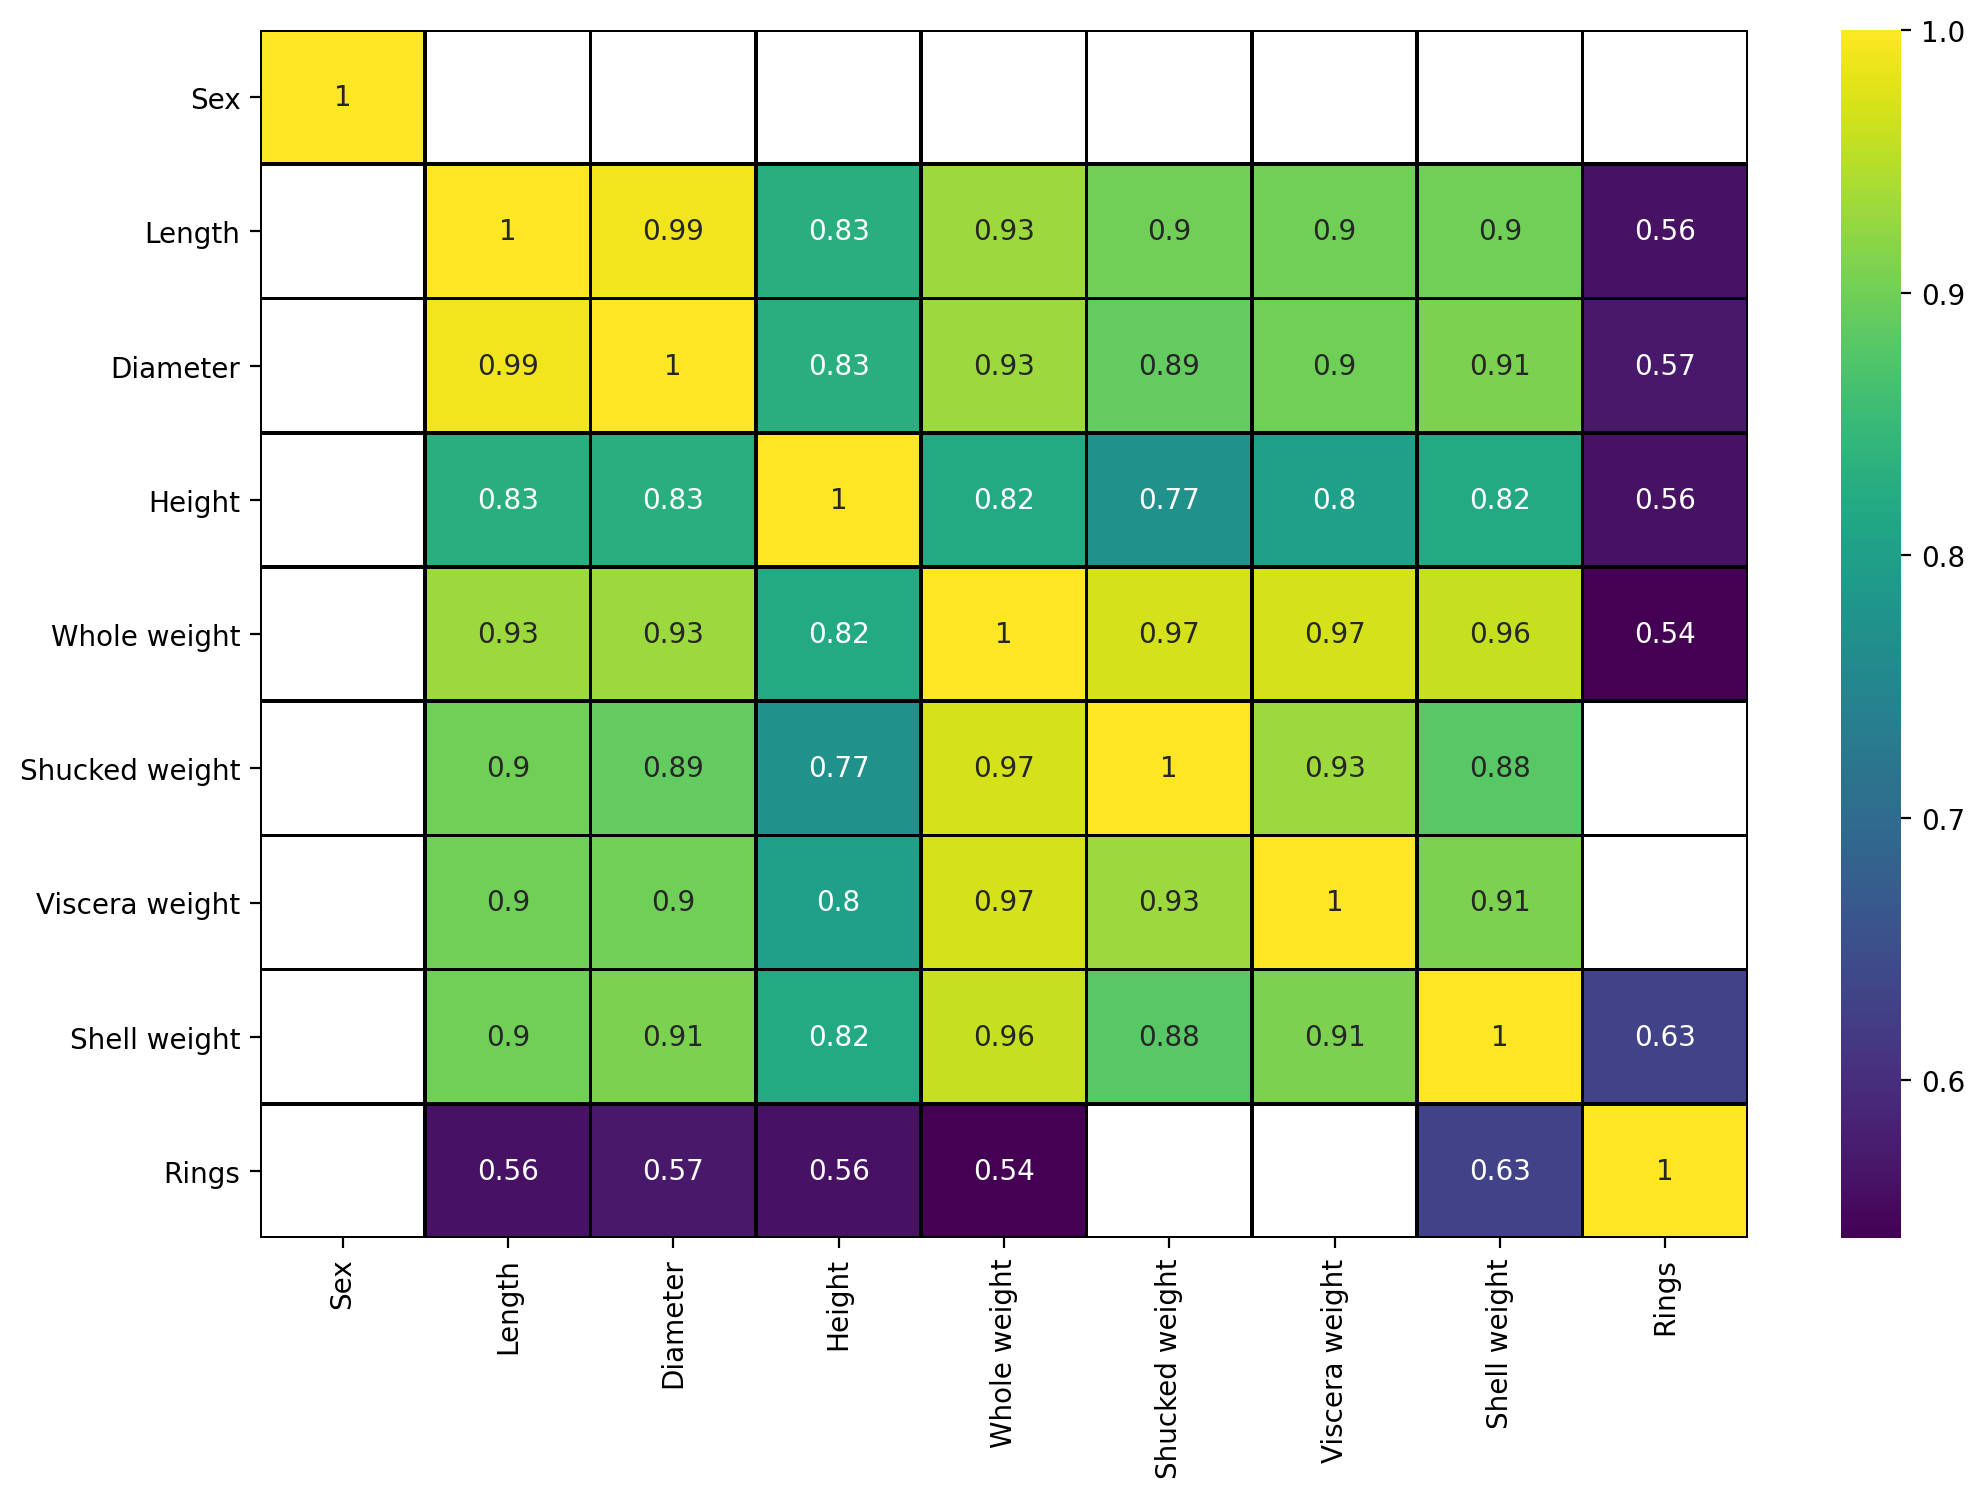

In [26]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc_strong_positive,cmap='viridis',annot=True,linecolor='black',linewidths=1)

There are many variables having strong  positive correlation between them:

length,diameter,height,shucked weight,viscera weight,
shell weight




In [27]:
#columns having strong negative correlation is denoted as dfc_strong_negative.
dfc_strong_negative=dfc[(dfc<-0.5)]
dfc_strong_negative

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diameter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whole weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shucked weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viscera weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shell weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

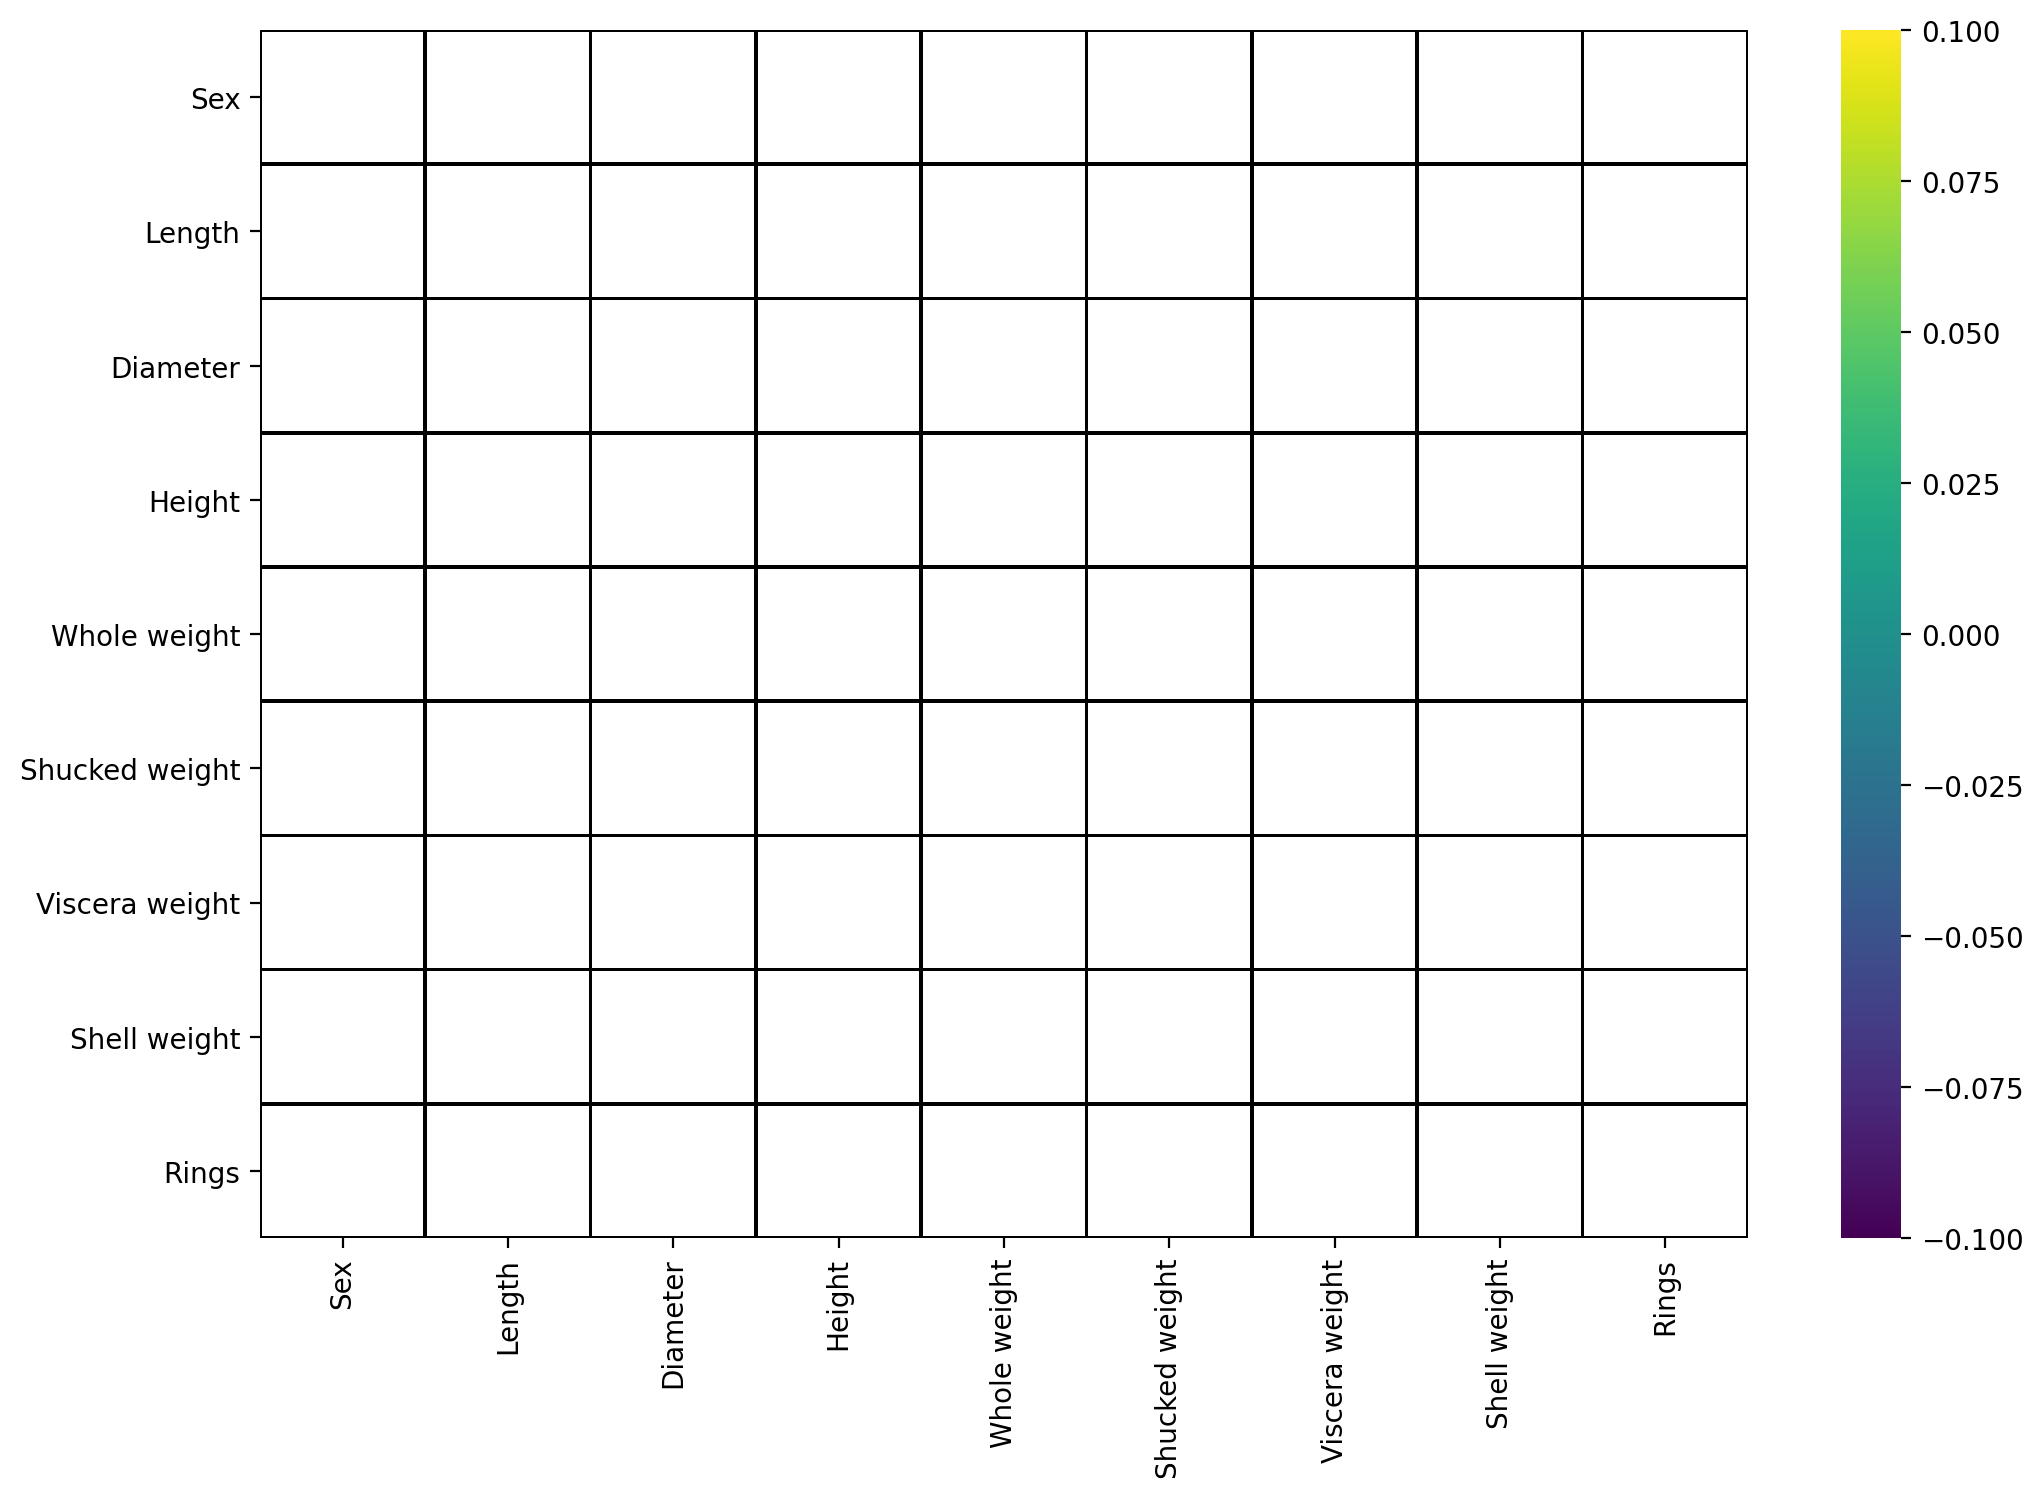

In [28]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc_strong_negative,cmap='viridis',annot=True,linecolor='black',linewidths=1)

There seems to be no two variables having strong negative relationship or correlation.

#### OUTLIERS DETECTION AND REMOVAL:-

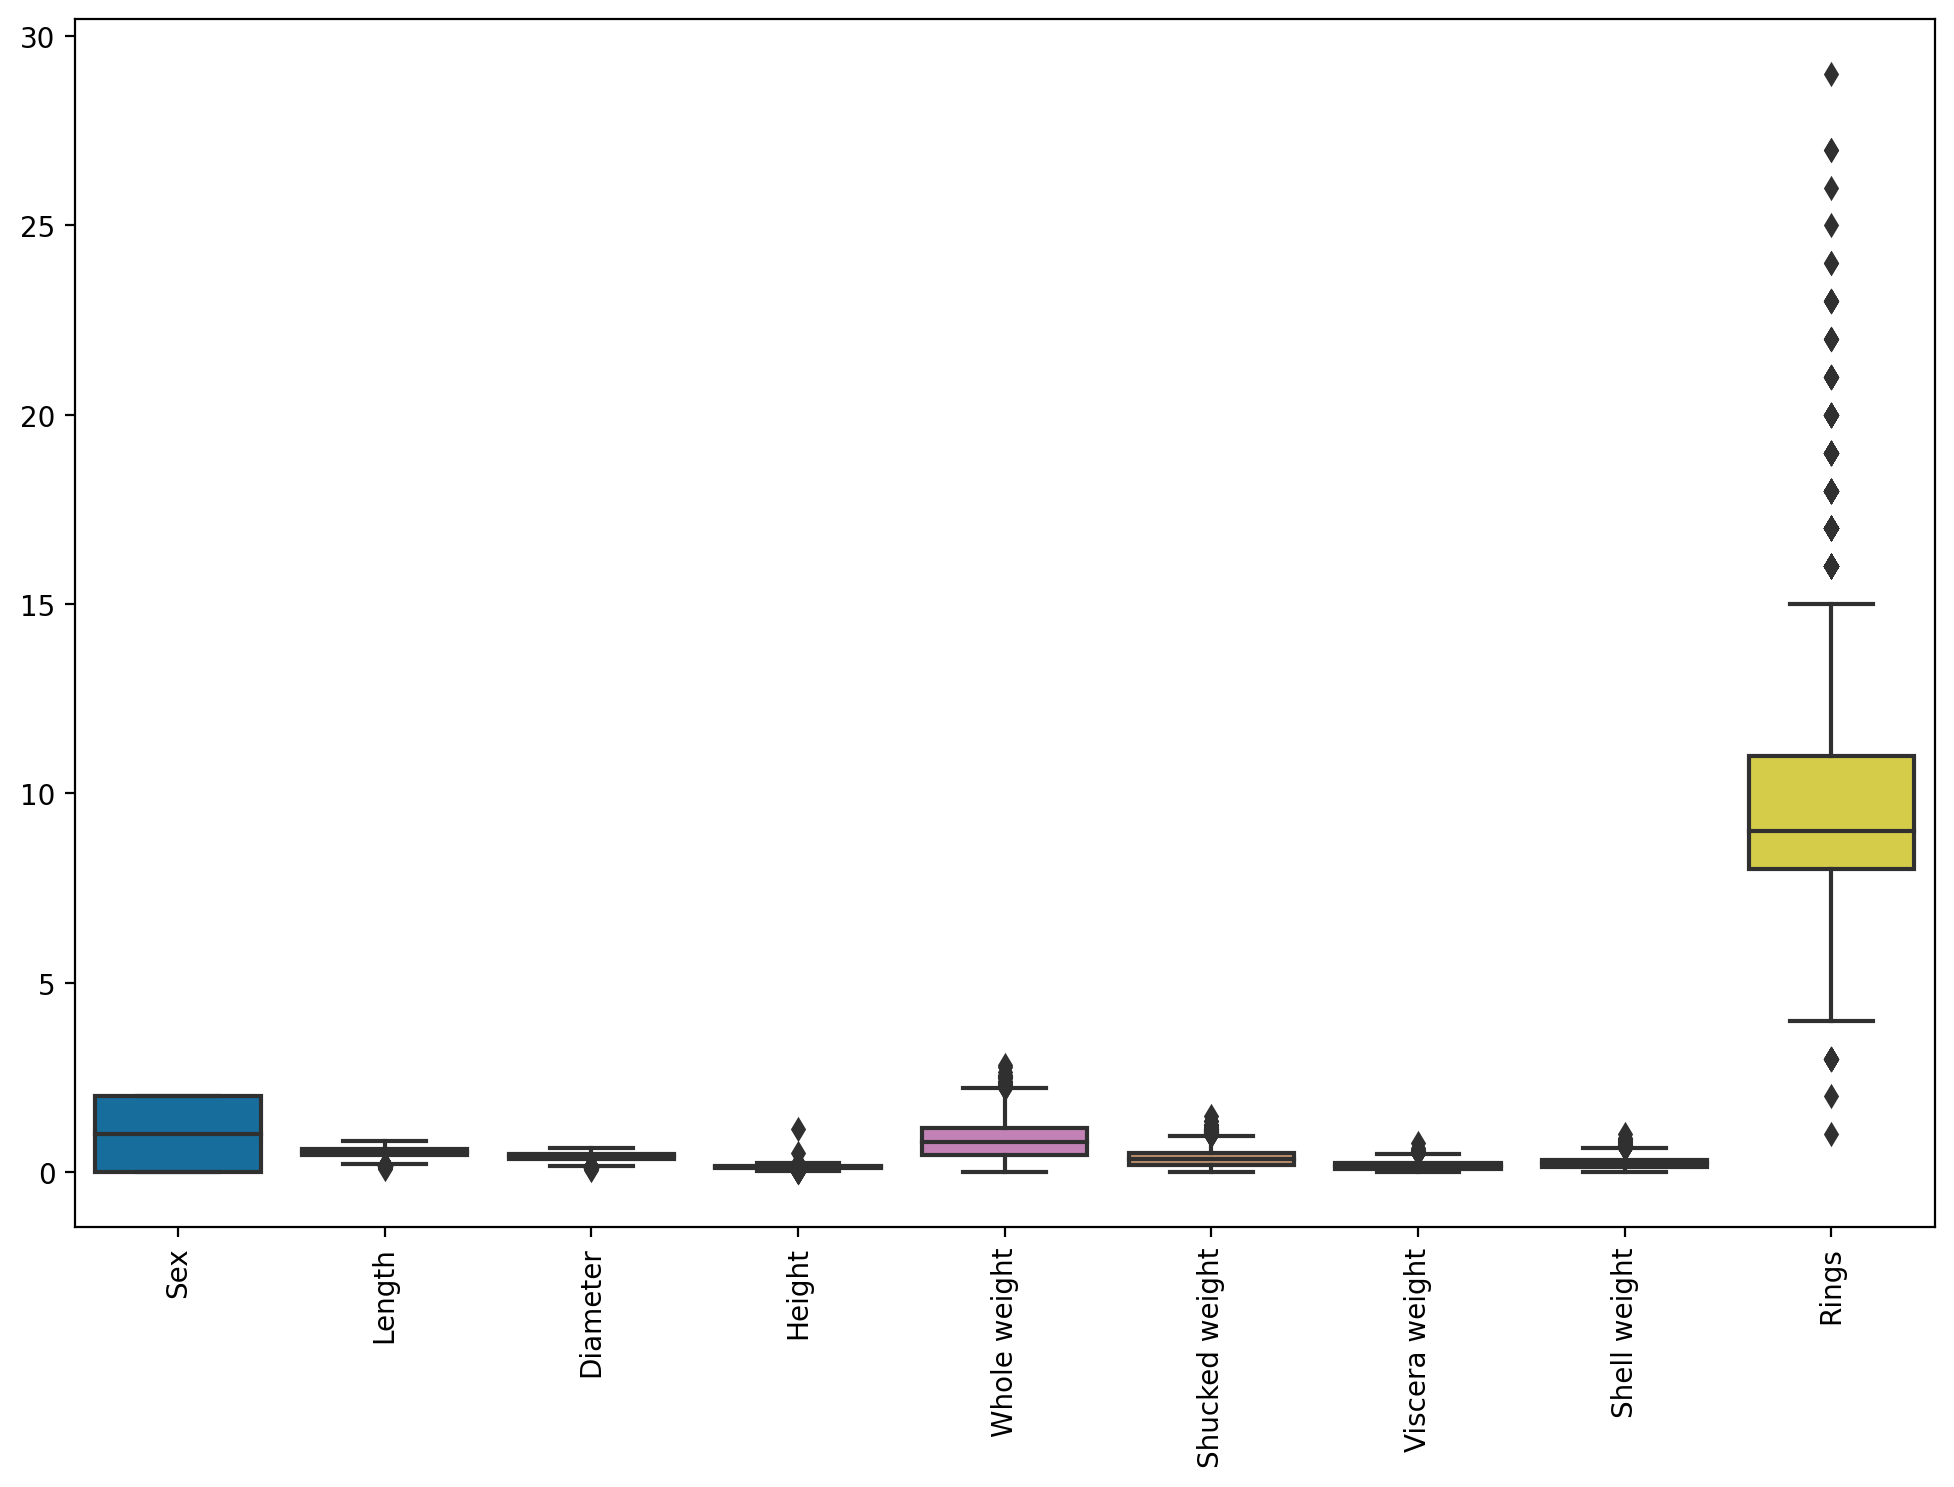

In [29]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data=df,palette='colorblind')
plt.xticks(rotation=90);

There are many outliers present in the dataset shown by boxplot denoted by 'black diamonds'.

In [30]:
#Outliers Removal:-
from scipy.stats import zscore
threshold=3
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
print(dfn.shape)
print(df.shape)

(4027, 9)
(4177, 9)


In [31]:
4027/4177*100

96.40890591333493

I REMOVED ABOUT 4% OF THE DATA AS OUTLIERS.

##### SKEWNESS REMOVAL:-¶

In [32]:
dfn.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [33]:
skew_after_outliers_removal = dfn.skew()

In [34]:
skew_after_outliers_removal = skew_after_outliers_removal.reset_index()

In [35]:
skew_after_outliers_removal.head()

,index,0
0,Sex,-0.094886
1,Length,-0.623076
2,Diameter,-0.598650
3,Height,-0.244251
4,Whole weight,0.334204


In [36]:
skew_after_outliers_removal.rename(columns={'index':'NAMES',0:'skewness'},inplace=True)

In [37]:
skew_after_outliers_removal

,NAMES,skewness
0,Sex,-0.094886
1,Length,-0.623076
2,Diameter,-0.598650
3,Height,-0.244251
4,Whole weight,0.334204
5,Shucked weight,0.458295
6,Viscera weight,0.437116
7,Shell weight,0.349471
8,Rings,0.725464


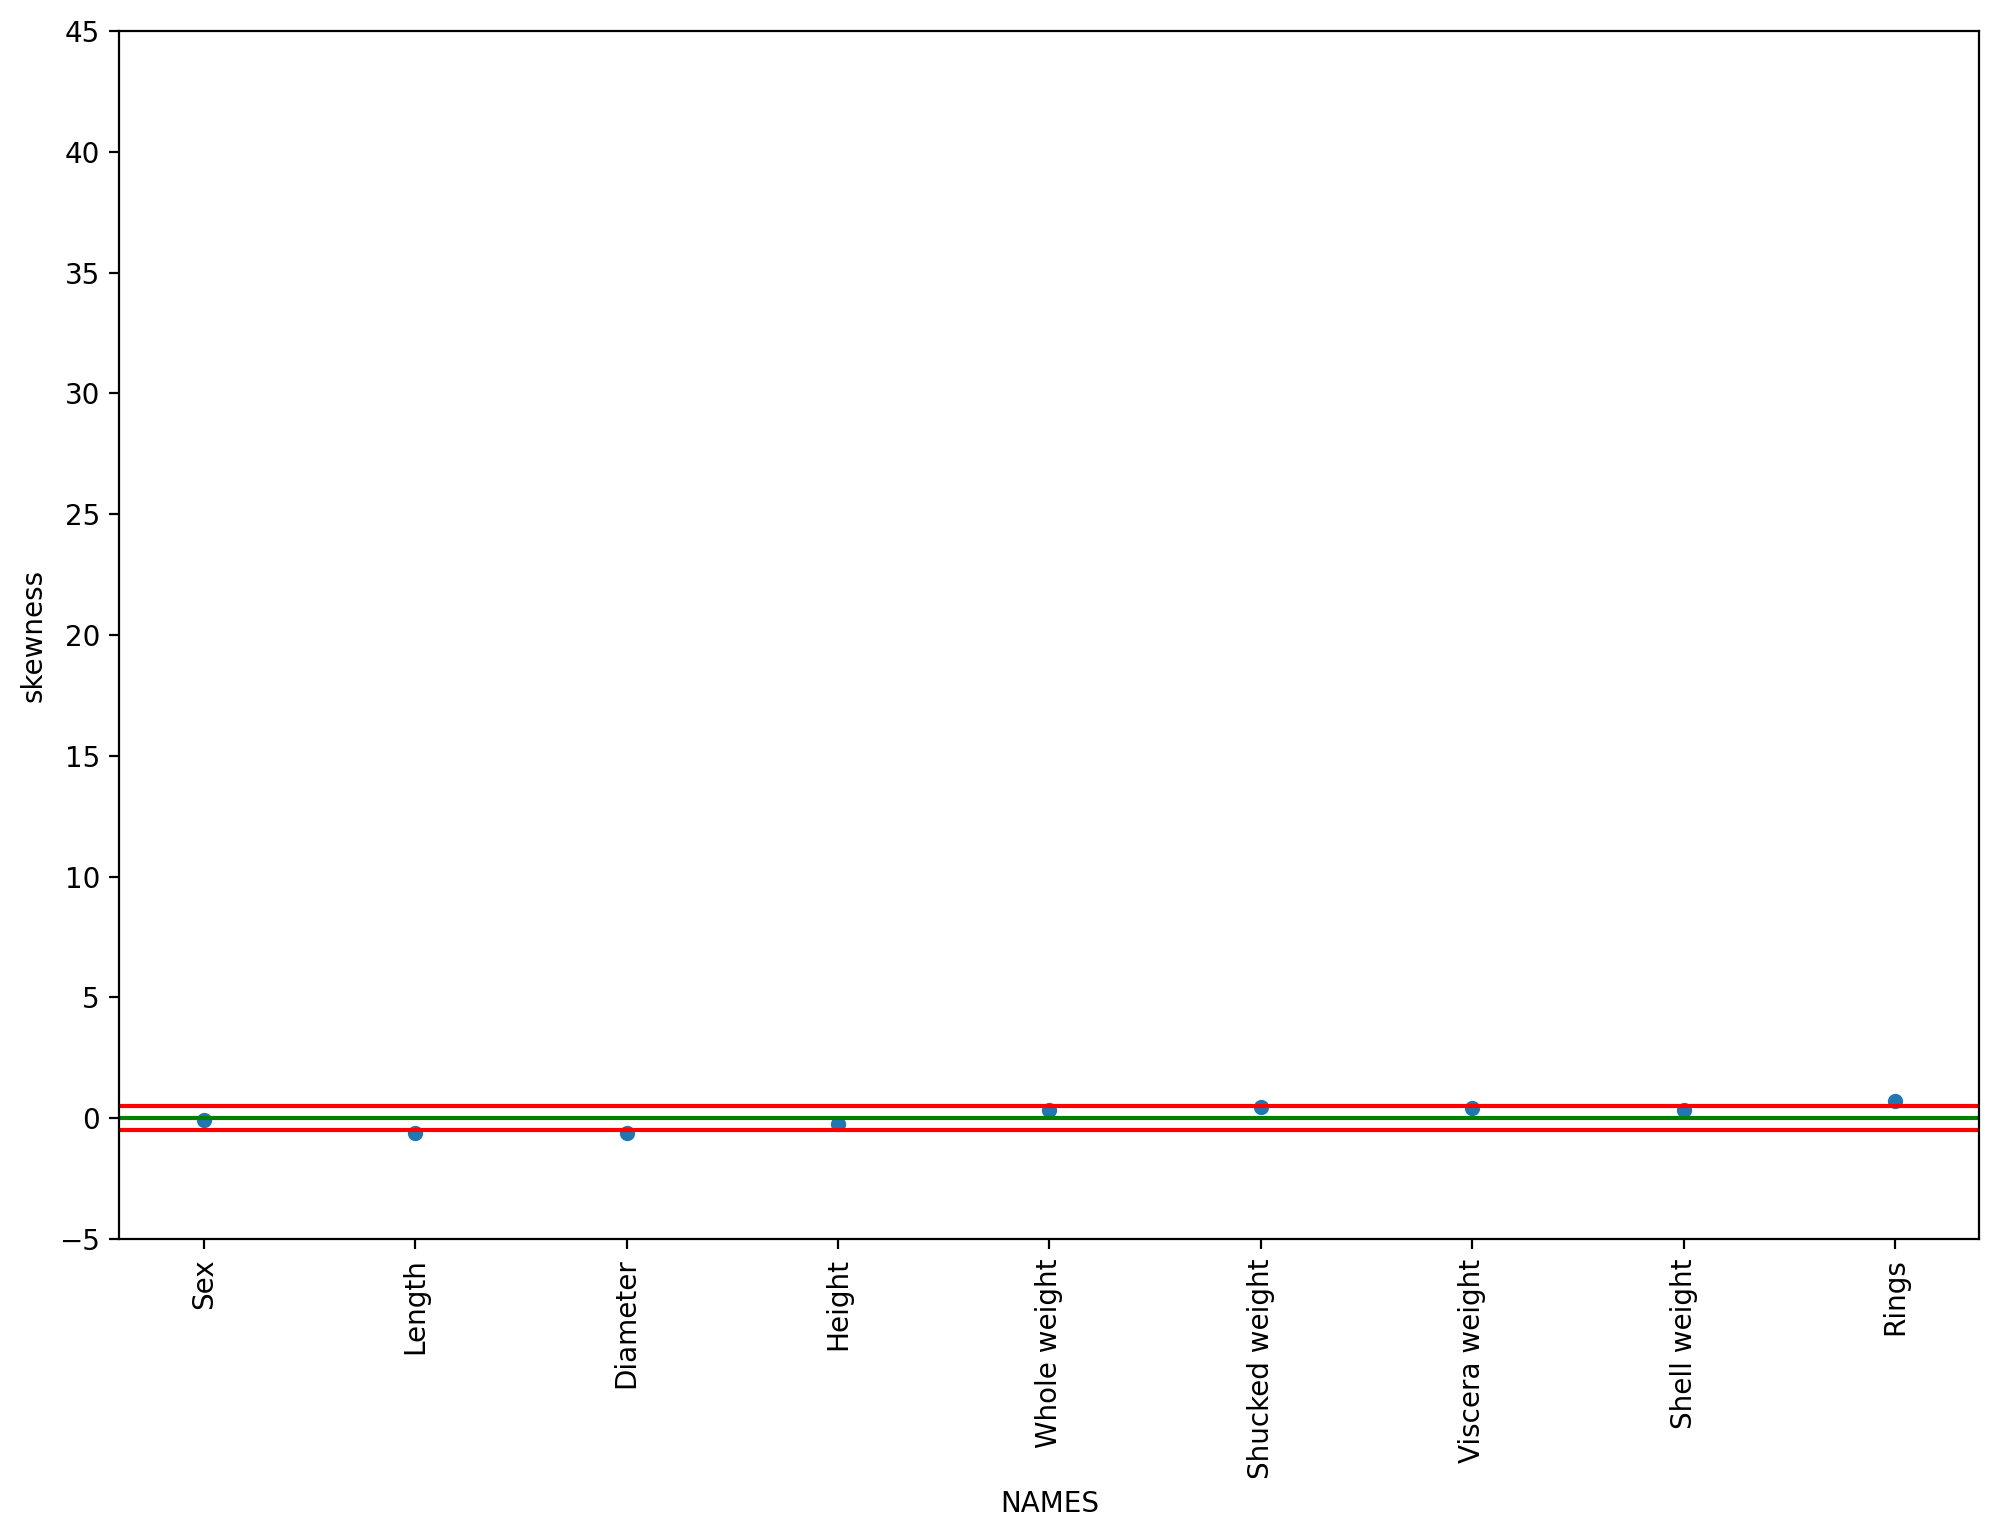

In [38]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skew_after_outliers_removal,x='NAMES',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 50, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

SKEWNESS HAS BEEN REMOVED WITH THE HELP OF OUTLIERS REMOVAL METHOD.
SKEWNESS CHECK AND OBSERVATIONS:- PLOTTED SKEWNESS FOR ALL DATA DISTRIBUTIONS AGAINST COLUMNS OF THE DATA. PLOTTED GREEN HORIZONTAL LINE FOR A SKEWNESS OF ZERO(NORMAL DISTRIBUTION HAS ASKEWNESS OF 0). PLOTTED RED LINES AROUND THE GREEN LINE DENOTING A RANGE OF(-0.5,0.5). IF DATA POINTS FALL WITHIN THE ABOVE MENTIONED RANGE,THEN THEY ARE APPROXIMATELY NORMALLY DISTRIBUTED .

FOUND NO DATA POINTS WITHIN THE RANGE. ALL THE DATA POINTS ARE HIGHLY SKEWED. The rule for skewness seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data are moderately skewed.

Skewness of the normal distribution is zero. All the dataset columns seem to have a skewness of more than 0.5 (except for the label) and even more than 1,so they all are highly skewed.They all have a right-skewed data or a positively-skewed data curve since the right tail is longer and mass of the distribution is concentrated on the left of the figure.

In [39]:
dfn.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## MACHINE LEARNING PROCESS:-

In [40]:
#seperating the target lable and features:-
X=dfn.drop('Rings',axis=1) 
y=dfn['Rings']

Rings is the target label and all the other columns are features.

##### Importing the necessary models for regression tasks and cross validation:-

In [41]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

In [42]:
en = ElasticNet()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
rfr = RandomForestRegressor()
ar = AdaBoostRegressor()
gbr= GradientBoostingRegressor()
sr = SVR()
lgbr = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.001, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
list1 = [dtr,rfr,ar,gbr,lgbr]
list2= [en,dtr,rfr,ar,gbr,sr,lgbr]

##### choosing the best random state:-¶

In [58]:
min_squared_error = 0
max_random_state = 0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model=DecisionTreeRegressor()
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)   

lowest error is:  0  on random_state  0


In [59]:
en = ElasticNet()
dtr = DecisionTreeRegressor(random_state=0)
knr = KNeighborsRegressor()
rfr = RandomForestRegressor(random_state=0)
ar = AdaBoostRegressor(random_state=0)
gbr= GradientBoostingRegressor(random_state=0)
sr = SVR()
lgbr = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=None,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
list1 = [dtr,rfr,ar,gbr,lgbr]
list2= [en,dtr,rfr,ar,gbr,sr,lgbr]

In [60]:
#seperating the training data and test data:-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

seperated the training data and test data:-

### SCALING AND STANDARDIZATION:-¶

In [61]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
sX_train = s.fit_transform(X_train)
sX_test = s.transform(X_test)

Only training data has been both fit and transformed but the test data has only been transformed. '.fit' means calculating necessary statistics from the data and '.transform' only scales the data. test data should not be fit because that would lead to assumption of the prior knowledge of the test data and test data is the data, machine learning model need to predict fairly without having any knowledge of the test data.

In [62]:
from sklearn.metrics import SCORERS
s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

IMPORTED THE SCORING METRICS.

In [63]:
for m in list2:
    m.fit(sX_train,y_train)
    preds = m.predict(sX_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('difference in scores between model score and cross validation scores :',
          (-rmse-cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean()))
    print('\n')

ElasticNet()
difference in scores between model score and cross validation scores : 0.4908226255193249


DecisionTreeRegressor(random_state=0)
difference in scores between model score and cross validation scores : -0.002031780536229544


RandomForestRegressor(random_state=0)
difference in scores between model score and cross validation scores : -0.031417232378100346


AdaBoostRegressor(random_state=0)
difference in scores between model score and cross validation scores : 0.030139825411249266


GradientBoostingRegressor(random_state=0)
difference in scores between model score and cross validation scores : -0.0155157066506737


SVR()
difference in scores between model score and cross validation scores : 0.07353316516753683


LGBMRegressor(max_depth=None, n_estimators=300)
difference in scores between model score and cross validation scores : -0.023925555282505506




the rmse has been written as -rmse in calculating the difference between the model scores and cross validation scores.

the lower the difference in scores,the better the model is for being selected for hyperparameter tuning.
SUPPORT VECTOR REGRESSOR,ELASTIC NET AND ADA BOOST CLASSIFIER HAS LOWER DIFFERENCE IN SCORES.

### GRID SEARCH CV:-

In [64]:
from sklearn.model_selection import GridSearchCV

imported grid search cv

In [65]:
dtprr = {'max_features':["auto", "sqrt", "log2"],'criterion': ["mse", "friedman_mse", "mae"]}
rfprr = {'n_estimators':[100,150,200,300,160],'max_features':['auto','log2','sqrt']}
gbprr = {'n_estimators':[150,200,300,250],'learning_rate':np.linspace(0.1,5,15),'max_depth':[5,6],
        'max_features':['auto','log2','sqrt']}
svprr = {'kernel':['linear','rbf','poly'],'C':np.linspace(0,4,15),'epsilon':np.linspace(0,2,10),'degree':[1,2],
         'gamma':['scale','auto']}

enpr ={'alpha':np.linspace(0.1,3,10),"l1_ratio": [0.1,0.5,1,0.3], 'max_iter':[10000,100000,1000000]}
adprr = {'n_estimators':[200,150,100,300],
         'learning_rate':[0.1,0.001,0.5,0.2,1],
         'loss':['linear','square','exponential']}


setting parameters for multiple models

In [66]:
g1r = GridSearchCV(estimator=rfr,param_grid=rfprr)
g2r = GridSearchCV(en,param_grid=enpr)
g3r = GridSearchCV(sr,param_grid=svprr)
g4r=GridSearchCV(dtr,param_grid=dtprr)
g5r=GridSearchCV(gbr,param_grid=gbprr)
g6r = GridSearchCV(ar,param_grid=adprr)

setting grid search for every model

In [ ]:
print(g2r)
g2r.fit(sX_train,y_train)
y_pred=g2r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g2r.best_params_)
print('\n')

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1       , 0.42222222, 0.74444444, 1.06666667, 1.38888889,
       1.71111111, 2.03333333, 2.35555556, 2.67777778, 3.        ]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'max_iter': [1000, 10000, 100000, 10000000, 20000]})


In [52]:
print(g1r)
g1r.fit(sX_train,y_train)
y_pred=g1r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g1r.best_params_)
print('\n')

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 150, 200, 300, 160]})
Mean_absolute_error:  1.4350923628342982
Mean_squared_error:  3.8321436816469068
Root_mean_squared_error:  1.9575861875398761
R2_score:  0.5211698300130319
{'max_features': 'sqrt', 'n_estimators': 300}




In [53]:
print(g3r)
g3r.fit(sX_train,y_train)
y_pred=g3r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g3r.best_params_)
print('\n')

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([0.        , 0.28571429, 0.57142857, 0.85714286, 1.14285714,
       1.42857143, 1.71428571, 2.        , 2.28571429, 2.57142857,
       2.85714286, 3.14285714, 3.42857143, 3.71428571, 4.        ]),
                         'degree': [1, 2],
                         'epsilon': array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})
Mean_absolute_error:  1.4074013995200507
Mean_squared_error:  3.708466518561074
Root_mean_squared_error:  1.9257379153355927
R2_score:  0.5366234147279048
{'C': 4.0, 'degree': 1, 'epsilon': 1.7777777777777777, 'gamma': 'auto', 'kernel': 'rbf'}




In [54]:
print(g4r)
g4r.fit(sX_train,y_train)
y_pred=g4r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g4r.best_params_)
print('\n')

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Mean_absolute_error:  1.978494623655914
Mean_squared_error:  7.78494623655914
Root_mean_squared_error:  2.7901516511758175
R2_score:  0.027263213630598027
{'criterion': 'mse', 'max_features': 'sqrt'}




In [55]:
print(g5r)
g5r.fit(sX_train,y_train)
y_pred=g5r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g5r.best_params_)
print('\n')

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': array([0.1 , 0.45, 0.8 , 1.15, 1.5 , 1.85, 2.2 , 2.55, 2.9 , 3.25, 3.6 ,
       3.95, 4.3 , 4.65, 5.  ]),
                         'max_depth': [5, 6],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [150, 200, 300, 250]})
Mean_absolute_error:  1.4323031631421765
Mean_squared_error:  3.918647670367744
Root_mean_squared_error:  1.979557443058358
R2_score:  0.5103610704610027
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}




In [67]:
print(g6r)
g6r.fit(sX_train,y_train)
y_pred=g6r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g6r.best_params_)
print('\n')

GridSearchCV(estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.001, 0.5, 0.2, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [200, 150, 100, 300]})
Mean_absolute_error:  1.6718242276922908
Mean_squared_error:  4.581343642605616
Root_mean_squared_error:  2.1404073543616917
R2_score:  0.4275565486587387
{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}




In [69]:
lgbr

LGBMRegressor(max_depth=None, n_estimators=300)

In [70]:
lgp = {'n_estimators':[100,200,300],'boosting':['gbdt','dart','rf'] ,  'reg_alpha':[0,0.5,1,0.3],'reg_lambda':[0,1,0.5,0.6] ,
       'n_jobs' :[1,2,-1]  }

In [71]:
g7r = GridSearchCV(lgbr,param_grid=lgp)

In [73]:
print(g7r)
g7r.fit(sX_train,y_train)
y_pred=g7r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g7r.best_params_)
print('\n')

GridSearchCV(estimator=LGBMRegressor(max_depth=None, n_estimators=300),
             param_grid={'boosting': ['gbdt', 'dart', 'rf'],
                         'n_estimators ': [100, 200, 300], 'n_jobs': [1, 2, -1],
                         'reg_alpha': [0, 0.5, 1, 0.3],
                         'reg_lambda': [0, 1, 0.5, 0.6]})
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boos

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_est

[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] num_iterations is set=300, n_estimators= will be ignored. Current value: num_iterations=300
Mean_absolute_error:  1.4213200883835264
Mean_squared_error:  3.989176932361701
Root_mean_squared_error:  1.9972924003164136
R2_score:  0.5015483689249507
{'boosting': 'dart', 'n_estimators ': 100, 'n_jobs': 1, 'reg_alpha': 1, 'reg_lambda': 1}




AFTER DOING GRID SEARCH FOR EVERY MODEL,SUPPORT VECTOR REGRESSOR WAS THE BEST PERFORMER.

In [88]:
srr = SVR(C=4.1,kernel='rbf',degree=1,gamma='auto',epsilon=1.77)

SETTING SUPPORT VECTOR  REGRESSOR WITH THE BEST PARAMETERS FFOUND IN GRID SEARCH.

In [89]:
print(srr)
srr.fit(sX_train,y_train)
y_pred=srr.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print('\n')

SVR(C=4.1, degree=1, epsilon=1.77, gamma='auto')
Mean_absolute_error:  1.4064752473880868
Mean_squared_error:  3.706650728730605
Root_mean_squared_error:  1.9252664046127759
R2_score:  0.5368502994758196




## SAVING THE MODEL:-

In [90]:
import joblib

In [91]:
joblib.dump(srr,'best_model.obj')

['best_model.obj']

In [92]:
loaded_model = joblib.load('best_model.obj')

In [93]:
loaded_model

SVR(C=4.1, degree=1, epsilon=1.77, gamma='auto')